# This is a `basicRaytracing` python-based example of CPU 3D ray-tracing rendering application
## This notebook has been updated by Prof. George Papagiannakis as an introduction to CPU-based ray-tracing for Elements 
### the code is based on the book "Ray Tracing in One Weekend" by Peter Shirley (https://raytracing.github.io/books/RayTracingInOneWeekend.html)
### *Copyright 2021-2022 Dr. George Papagiannakis,  papagian@csd.uoc.gr*
*All Rights Reserved*
### *University of Crete & Foundation for Research & Technology - Hellas (FORTH)*
---
This notebook is also based on parts of the C++ implementation of Raytracing in One Weekend: https://github.com/RayTracing/raytracing.github.io and the Python/numpy step-by-step tutorial: https://github.com/alfiopuglisi/raytrace_weekend_numpy/blob/master/raytrace_weekend_numpy.ipynb. 


## Overview

The purpose is to create a basic example of ray-tracing, purely on CPU, resulting in creating realistic and engaging images via motivating and easy to follow coding examples. 



## 1. Output an image in pure Python and PPM format
The code below outputs a simple background image using the PPM file format based on the original `RayTracingInOneWeekend` book by P. Shirley as found [here](https://github.com/RayTracing/raytracing.github.io/tree/release). 

The PPM file format is a very simple file format that can be used to output an image. The code below outputs a PPM image file that is `image_width` pixels wide and `image_height` pixels high. The image is a gradient that goes from black to *red* on top right, *green* to bottom left and the combination of *red + green = yellow* on bottom right.

Here is an example of the PPM file format, from *Wikipedia*:

![PPM 3x2 example](RayTracing/InOneWeekend/data/PPMexample.png)

In the above figure, the image grid is `2x3`, thus `y` is the width *(columns)* and `x` is the height *(rows)*. The first line is the header, the second line is the pixel color data. 

The header is `P3` which means the colors are in ASCII, `3 2` are the width and height, and `255` is the maximum color value. 

The pixel color data is in the format `R G B` where `R` is the red value, `G` is the green value, and `B` is the blue value. 

The pixel color data is in row-major order, so the first row is: 
`255 0 0   0 255 0   0 0 255` 
and the second row is: 
`255 255 0  255 255 255  0 0 0`

# what is row-major order for storage?
Row-major order is a method of storing or accessing multidimensional arrays in memory. In this method, the elements in each row of the array are stored in consecutive memory locations. This means that when you iterate over the array, you will first go through all the elements in the first row, from left to right, then move on to the second row, and so on.

In the context of pixel data, an image can be thought of as a 2D array (or a 3D array for color images), where each element of the array represents a pixel. If the pixel data is stored in row-major order, this means that the pixels are stored or accessed row by row. The top row of pixels (row 0) is stored first, followed by the second row (row 1), and so on. Within each row, the pixels are stored from left to right.

The following figure illustrates the concept of row-major order for a `w by h` image, where `w` is the width of the image and `h` is the height of the image and the pixel data is stored in row-major order. The numbers represent the order in which the pixels are stored in memory, with the first pixel at the top left and the last pixel at the bottom right. Typically we use indices like **`i` for the rows** and **`j` for the columns**, so the pixel at row `i` and column `j` is stored at position `i * w + j` in the memory (if we flatten the 2D image grid into a one-dimensional array).

![image wxh example](RayTracing/InOneWeekend/data/pixel-grid.png)

This is the standard way of storing images in most image processing libraries, including Python's PIL and OpenCV. 

It is also the way that images are typically displayed on screen, with the first pixel at the top left and the last pixel at the bottom right. Common indices for rows are `i`, `w` or `x` for the columns are `j`, `h`, `y`:

| rows (r)  | Columns (c) |
|----------|----------|
| e.g.2    | e.g. 3    |
| i    | j    |
| h    | w    |
| x    | y    |

For some weird reason, Shirle's first example uses 'j' for rows and 'i' for columns, but we will stick to the standard convention and htis is reflected in the following code.

This Python script below performs the following operations according to Shirley's book:

- It sets the image `image_width` *(number of columns)* and `image_height` *(number of rows)*.
- It opens a new file `output.ppm`` to write the image data.
- It writes the header for the PPM file format.
- It then iterates over each pixel in the image, calculating the *red (r)* and *green (g)* components based on the pixel's position. The *blue* component *(b)* is set to 0.
- It **converts** these *floating-point* color values to **integers** in the **range 0 to 255**.
- Finally, it writes these color values into the file *for each pixel*.
-
When this script is run, it will create a file named `output.ppm`` which will contain the image data in the PPM format, producing a gradient image.

The conversion of the color values to integers between 0 and 255 in the given code is a crucial step for representing colors in digital images, especially in formats like PPM (Portable Pixmap). Here's an explanation of how this conversion works:

1. **Fractional Color Values**: Initially, the color values (`r`, `g`, and `b`) are calculated as fractions. These fractions represent how "intense" or "bright" the color is. A value of 0 means no intensity (black), and a value close to 1 means full intensity. For example, in the code, `r` and `g` values vary from 0 to almost 1 across the width and height of the image.

2. **Scaling to 0-255 Range**: Most digital images use 8 bits per color channel, which allows for 256 different levels of intensity per channel (from 0 to 255). To convert a fractional intensity value to this range, it is multiplied by the maximum intensity level (255). However, to ensure the maximum fractional value (just below 1) maps correctly to 255, the multiplier is slightly less than 256, often chosen as 255.999. This adjustment helps in rounding off the values correctly.

3. **Conversion to Integer**: 
   - After multiplication, the resulting value is in the range from 0 to 255.999.
   - This value is then converted to an integer. In C++, the `static_cast<int>()` is used, and in Python, this is done simply by using `int()`. This step truncates (or effectively rounds down) the decimal part, resulting in an integer value in the desired range of 0 to 255.

4. **Application in the Code**: 
   - In the context of the code, each pixel's color intensity for red (`r`) and green (`g`) is calculated based on its position.
   - `r` varies horizontally, and `g` varies vertically. The blue component (`b`) is set to 0, which means there will be no blue intensity in any pixel.
   - These values are then scaled and converted to integers, giving us the appropriate red and green color values for each pixel to be written in the PPM file.

5. **Print progress indicator**:
   - This Python code uses f-string formatting to embed the expression `image_height - j` within the string. The `end=' '` argument replaces the default newline character that `print` adds to the end of its output with a space. The `flush=True` argument ensures that the output is flushed (i.e., immediately written) to the terminal, which is the equivalent of `std::flush` in C++.

By performing this conversion for each pixel, the code effectively generates the color information for an entire image, where each pixel's color is represented by a set of three integers (representing the red, green, and blue channels) in the range of 0 to 255.

> As described, the image shows a gradient:

- The **red component (R)** increases from *left to right*.
- The **green component (G)** increases from *top to bottom*.
- The **blue component (B)** is consistently zero across the image.

This results in a color transition from black at the top-left corner (where both R and G are zero) to yellow at the bottom-right corner (where both R and G are at their maximum, with no blue component).

In [1]:
import numpy as np 

# Set image dimensions
image_width = 256
image_height = 256

# Open a file to write the PPM image
with open("shirleyRTinOneWeekendFirstExample.ppm", "w") as file:
    # Write PPM header
    file.write("P3\n")
    file.write(f"{image_width} {image_height}\n")
    file.write("255\n")

    # Loop over each pixel and calculate color values
    # In this structure, the outer loop (for j in range(image_height)) iterates over the rows of the image, 
    # and for each row, the inner loop (for i in range(image_width)) iterates over the columns. 
    # This means that all the pixels in a row are processed before moving on to the next row, 
    # which is characteristic of row-major order.
    # This is the order in which the pixels are stored in memory, and it is the order in which the pixels are
    # written to the file. This is important because it means that the pixels are written to the file in the same order
    # that they are stored in memory, which is the most efficient way to write the image data to the file.
    # 
    # iterate over the rows of the image
    for i in range(image_height):
        # add a progress indicator
        print(f"\rScanlines remaining: {image_height - i}", end=' ', flush=True)
        #iterate over the columns of the image
        for j in range(image_width):
            r = j / (image_width - 1)
            g = i / (image_height - 1)
            b = 0.0

            # Convert color values to integers
            ir = int(255.999 * r)
            ig = int(255.999 * g)
            ib = int(255.999 * b)

            # Write the pixel color values to the file
            file.write(f"{ir} {ig} {ib}\n")

Scanlines remaining: 1   

In the next section, we show to visualize the above generated image using Python and explore the PPM file format in more detail.

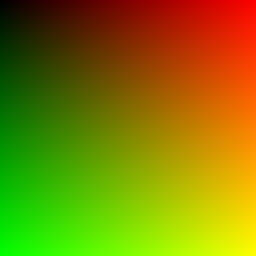

In [2]:
# use the PIL library to display the image we just created
from PIL import Image

# Load the image from a file
image = Image.open("shirleyRTinOneWeekendFirstExample.ppm")
# Display the image
display(image)

## 2. Create a PPM image using NumPy and visualize it using PIL

In this part we are **diverging from Shirley's book** in order to start optimizing the above `pure` pythonic translation of the C++ book code to a more efficient implementation using the Python Image Library (PIL) and NumPy libraries, rather than simply writing PPM files in ASCII in pure python that corresponds to the original C++ code. 

We are still following the book chapters and the code is based on the Python/numpy implementation of `Raytracing in One Weekend` by Peter Shirley, heavily inspired by the work of [Alfiopuglisi](https://github.com/alfiopuglisi/raytrace_weekend_numpy).

PIL can take as an input a multi-dimensional [rows,cols,channels] numpy array, which is exactly what we need. To vectorize the color computation, we are going to use one of the numpy "index tricks", *mgrid*. 



Lets first we create a simple method for debugging by visualising the PPM with each pixel coordinates as well as each pixel R,G,B values.

In [3]:
import matplotlib.pyplot as plt

def visualize_pixel_grid(img, subset):
    """"
    Visualize the pixel grid of an image by plotting a subset of the image and annotating each pixel with its coordinates and RGB values.
    """

    # extract a small subset of the image of width and height equal to subset
    smaller_image_array = img[0:subset,0:subset,:]

    # Plotting the grid of pixels
    fig, ax = plt.subplots(figsize=(subset, subset))
    ax.imshow(smaller_image_array, interpolation='nearest')

    # Annotating each pixel with its coordinates and RGB values
    for x in range(smaller_image_array.shape[0]):
        for y in range(smaller_image_array.shape[1]):
            rgb = smaller_image_array[x, y]
            annotation = f'({x},{y})\n[{rgb[0]},{rgb[1]},{rgb[2]}]'
            # Choosing text color based on the brightness of the pixel for better readability
            text_color = 'white' if np.mean(rgb) < 128 else 'black'
            ax.text(y, x, annotation, ha='center', va='center', fontsize=6, color=text_color)

    # Setting up the grid lines to match pixel boundaries
    ax.set_xticks(np.arange(-.5, subset, 1), minor=True)
    ax.set_yticks(np.arange(-.5, subset, 1), minor=True)
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    ax.tick_params(which='minor', size=0)
    # Hiding the major tick labels
    ax.tick_params(labelbottom=False, labelleft=False)

    plt.show()

Let's now start with an **1-D** NumPy *mgrid* example to generate 9 numbers from 0 to 8:

In [4]:

z = np.mgrid[0:9]
print(z)

[0 1 2 3 4 5 6 7 8]



In the following example, *mgrid* will give us a **2D** `2x3` grid of coordinates. The `x`array *(rows)* represents the **x-coordinates of each point on the grid**, and the `y` array *(columns)* represents the **y-coordinates of each point on the grid**.  The range 0:2 for both x and 0:3 for y specifies that the grid should cover values from 0 to 2 (inclusive), creating a 2x3 grid.

In the code: 
```python
x, y = np.mgrid[0:2,0:3], 
```
x and y are both 2D arrays generated by the `np.mgrid` function.

The np.mgrid function generates a multidimensional "meshgrid", which is a set of coordinate arrays for vectorized evaluations of functions over a grid. The resulting grid is a set of points in a 2D space.

In this case, x represents the row indices and y represents the column indices for the grid points.

So, for each point in the grid, x gives the row number and y gives the column number. The grid in this case would look like this:

```python
x = [[0, 0],
     [1, 1],
y = [[0, 1],
     [0, 1],
     [0, 1]]
```


an example of an equivalent `3x2` image grid is shown in Figure 1 above, based this time on `NumPy` arrays. The numbers represent the order in which the pixels are stored in memory, with the first pixel at the top left and the last pixel at the bottom right. Typically we use indices like **`i` for the rows** and **`j` for the columns**, so the pixel at row `i` and column `j` is stored at (i,j) of the multiudimensional array.):

Notice how the grid and the image are height,width instead of the opposite. This is because numpy works in `row-major` i.e. rows,columns order, and the number of rows corresponds to the image height.

Here we replicate the actual wikipedia PPM image as in figure 1, but using this time PIL and numpy libraries to create the image with `mgrid`. We also visualise it using matplotlib and our `visualise_pixel_grid()`.

x coordinates:
 [[0 0 0]
 [1 1 1]]
y coordinates:
 [[0 1 2]
 [0 1 2]]

(x,y) all pairs:
(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
[[255, 0, 0], [0, 255, 0], [0, 0, 255]]
[[255, 255, 0], [255, 255, 255], [0, 0, 0]]


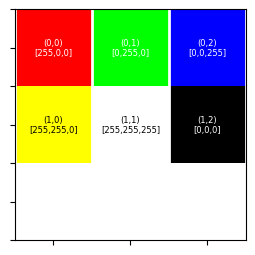

In [5]:
from PIL import Image

# create a 2x3 grid using numpy.mgrid
x, y = np.mgrid[0:2, 0:3]
print('x coordinates:\n', x)
print('y coordinates:\n', y)

print('\n(x,y) all pairs:')
x_flat = x.flatten()
y_flat = y.flatten()
for pair in zip(x_flat, y_flat):
    print(pair)

# Create a 2D array of lists
""""
The grid is a 2D array of lists, where each element of the grid is a list of 3 elements.
The size of the grid is determined by the shape of the x array, which is assumed to be 
a two-dimensional NumPy array.
The outer list comprehension for _ in range(x.shape[0]) is creating a list with a length 
equal to the number of rows in x. 
Each element of this list is another list, created by the inner list comprehension for _ in range(x.shape[1]).
The inner list comprehension is creating a list with a length equal to the number of columns in x. 
Each element of this list is an empty list [].
So, the result is a two-dimensional list (or list of lists) where the outer list represents rows 
and the inner lists represent columns. Each element in the grid is an empty list. 
This kind of structure could be useful in a variety of contexts, such as storing complex data 
associated with each point in a grid.
"""
grid = [[[] for _ in range(x.shape[1])] for _ in range(x.shape[0])]

# Iterate over the grid and assign an empty list of 3 elements to each position
for i in range(x.shape[0]): #rows
    for j in range(x.shape[1]): #columns
        grid[i][j] = [0, 0, 0]

#assign the color values to the grid
#assign red to element at position (0,0)
grid[0][0] = [255, 0, 0]
#assign green to element at position (0,1)
grid[0][1] = [0, 255, 0]
#assign blue to element at position (0,2)
grid[0][2] = [0, 0, 255]
#assign yellow to element at position (1,0)
grid[1][0] = [255, 255, 0]
#assign white to element at position (1,1)
grid[1][1] = [255, 255, 255]
#assign black to element at position (1,2)
grid[1][2] = [0, 0, 0]

# Print the grid
for row in grid:
    print(row)

# Create an image from the numpy grid array
image = Image.fromarray(np.uint8(grid))
# Save the image to a file
# image.save('3x2.ppm')
# Display the image using PIL
display(image)

#get the image array from the image
image_array = np.array(image)
visualize_pixel_grid(image_array,3)

We conclude this section by comparing the two methods, the pure pythonic and the numpy/PIL one, and we will see that the numpy/PIL method is much faster and more efficient. Thus we are moving on to the next chapters of the book using the numpy/PIL method.

We will also convert the indexes to floating point. The image is pre-allocated in order to allow numpy to work on big arrays, and instead of looping over each element, we use numpy to calculate all pixel values in one go.

ii is:
 [[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [253. 253. 253. ... 253. 253. 253.]
 [254. 254. 254. ... 254. 254. 254.]
 [255. 255. 255. ... 255. 255. 255.]]
jj is:
 [[  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 ...
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]
 [  0.   1.   2. ... 253. 254. 255.]]


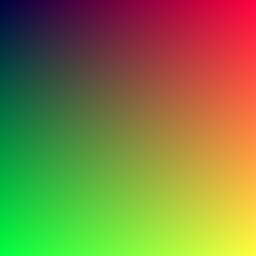

In [6]:
from PIL import Image

# Image
width = 256
height = 256

# Create numpy array representing the image
# The shape of the array will be (height, width, 3)
# The '3' represents the RGB values
# The dtype='uint8' means values will be unsigned integers (0 to 255)
# The initial values are all 0, which represents black
# The array is stored in a variable named 'img'
# ii and jj are 2D arrays containing the rows and column indices respectively of the pixels in the image
ii, jj = np.mgrid[:float(height), :float(width)]
print('ii is:\n', ii)
print('jj is:\n',jj)
# Create a 3D numpy array of zeros (height, width, 3 RGB channels) that is the same size as the image
img = np.zeros((height, width, 3), dtype='uint8')

# Set the RGB values in the numpy array
# The first line, r = jj/(width-1), is calculating the red component (r) of the color for each pixel. 
# The red component is determined by the x position of the pixel: pixels on the left (where jj is small) 
# will have a low red component, and pixels on the right (where jj is large) will have a high red component.
# division with `width-1` is to normalize the value to be between 0 and 1
r = jj/(width-1) # red component, increasing from left to right, as jj increases (columns)
# similar calculation for green component
g = ii/(height-1) #green component, increasing from top to bottom as ii increases (rows)
b = 0.25 # blue component, constant value

# Set the RGB values in the numpy 3D array array: 0=red, 1=green, 2=blue arrays
# The first index is the row number (i.e. y coordinate)
# The second index is the column number (i.e. x coordinate)
# The third index is the color channel (0=red, 1=green, 2=blue)
# The values are multiplied by 255 to convert from floating point
#   values in the range 0.0 to 1.0 to integer values in the range 0 to 255
img[:,:,0] = 255.299*r
img[:,:,1] = 255.299*g
img[:,:,2] = 255.299*b

# Create an image from the numpy array
image = Image.fromarray(img)
# Save the image to a file
# image.save('shirleyRTinOneWeekendFirstExampleNumpy.ppm')
# Display the image using PIL
display(image)

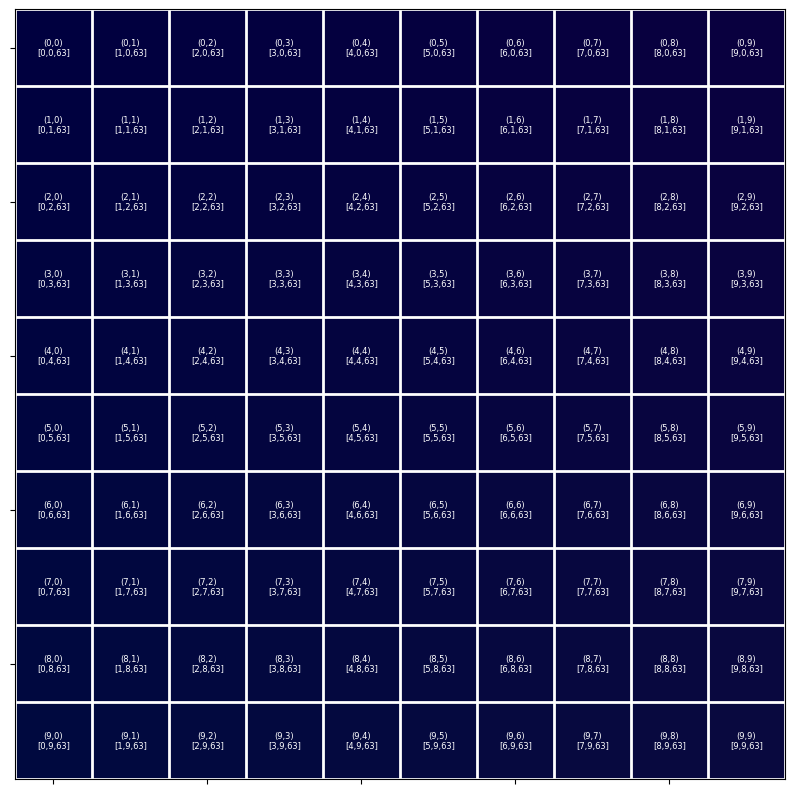

In [7]:
visualize_pixel_grid(np.array(image),10)


## 3. The vec3 class

We need a basic vec3 type like the one in the C++ book. Following Python traditions, class members are not encaspsulated with getters/setters (if needed, you can always turn them into properties later, without breaking backward compatibility). We also add a few useful methods, that will allow us to use the Vec3 almost as if it was a regular numpy array.

Almost all graphics programs have some class(es) for storing geometric vectors and colors. In many systems thesevectors are 4D (3D position plus a homogeneous coordinate for geometry, or RGB plus an alpha transparencycomponent for colors). For our purposes, three coordinates suffice. We’ll use the same class `vec3` for `colors,locations, directions, offsets`, whatever. Some people don’t like this because it doesn’t prevent you from doingsomething silly, like subtracting a position from a color. They have a good point, but we’re going to always take the “less code” route when not obviously wrong. 

However, we do declare two aliases for vec3: `point3` and `color`.

Since these two types are just aliases for vec3, you won't get warnings if you pass a color to a function expecting apoint3, and nothing is stopping you from adding a point3 to a color, but it makes the code a little bit easier to readand to understand.

In [8]:
class Vec3:
    """
    A class representing a 3D vector.

    Attributes:
        x (np.ndarray): The x-component of the vector.
        y (np.ndarray): The y-component of the vector.
        z (np.ndarray): The z-component of the vector.

    The x,y,z attributes in the Vec3 class are arrays instead of a single value
    This allows the Vec3 class to represent a collection of 3D vectors, not just a single 3D vector. 
    This can be useful in many contexts, such as ray tracing,
    where you often need to work with large collections of vectors at once.
    By storing x, y, and z as arrays, each instance of Vec3 can represent multiple vectors. 
    For example, the x array could hold the x-coordinates of all vectors, the y array could hold the y-coordinates, 
    and the z array could hold the z-coordinates of all vectors in the scene. 
    This design can make it easier to perform operations on all vectors at once, 
    leveraging the power of NumPy's array operations for efficient computation.
    """

    def __init__(self, x=0.0, y=0.0, z=0.0):
        self.x = x if type(x) == np.ndarray else np.array(x, dtype=np.float32)
        self.y = y if type(y) == np.ndarray else np.array(y, dtype=np.float32)
        self.z = z if type(z) == np.ndarray else np.array(z, dtype=np.float32)

    @staticmethod
    def empty(size):
        x = np.empty(size, dtype=np.float32)
        y = np.empty(size, dtype=np.float32)
        z = np.empty(size, dtype=np.float32)
        return Vec3(x,y,z)

    @staticmethod
    def zeros(size):
        x = np.zeros(size, dtype=np.float32)
        y = np.zeros(size, dtype=np.float32)
        z = np.zeros(size, dtype=np.float32)
        return Vec3(x,y,z)

    @staticmethod
    def ones(size):
        x = np.ones(size, dtype=np.float32)
        y = np.ones(size, dtype=np.float32)
        z = np.ones(size, dtype=np.float32)
        return Vec3(x,y,z)
    
    @staticmethod
    def where(condition, v1, v2):
        x = np.where(condition, v1.x, v2.x)
        y = np.where(condition, v1.y, v2.y)
        z = np.where(condition, v1.z, v2.z)
        return Vec3(x,y,z)
    
    def clip(self, vmin, vmax):
        x = np.clip(self.x, vmin, vmax)
        y = np.clip(self.y, vmin, vmax)
        z = np.clip(self.z, vmin, vmax)
        return Vec3(x,y,z)

    def fill(self, value):
        self.x.fill(value)
        self.y.fill(value)
        self.z.fill(value)

    def repeat(self, n):
        x = np.repeat(self.x, n)
        y = np.repeat(self.y, n)
        z = np.repeat(self.z, n)
        return Vec3(x,y,z)
    
    def __str__(self):
        return 'vec3: x:%s y:%s z:%s' % (str(self.x), str(self.y), str(self.z))
    
    def __len__(self):
        return self.x.size

    def __add__(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __sub__(self, other):
        return Vec3(self.x - other.x, self.y - other.y, self.z - other.z)

    def __neg__(self):
        return Vec3(-self.x, -self.y, -self.z)

    def __mul__(self, scalar):
        return Vec3(self.x*scalar, self.y*scalar, self.z*scalar)

    def multiply(self, other):
        return Vec3(self.x * other.x, self.y * other.y, self.z * other.z)

    def __truediv__(self, scalar):
        return Vec3(self.x/scalar, self.y/scalar, self.z/scalar)
    
    def tile(self, shape):
        '''Replicate np.tile on each component'''
        return Vec3(np.tile(self.x, shape), np.tile(self.y, shape), np.tile(self.z, shape))

    def __getitem__(self, idx):
        '''Extract a vector subset'''
        return Vec3(self.x[idx], self.y[idx], self.z[idx])
    
    def __setitem__(self, idx, other):
        '''Set a vector subset from another vector'''
        self.x[idx] = other.x
        self.y[idx] = other.y
        self.z[idx] = other.z

    def join(self):
        '''Join the three components into a single 3xN array'''
        return np.vstack((self.x, self.y, self.z))
    
    def append(self, other):
        '''Append another vector to this one.
        Use concatenate() because cupy has no append function.
        '''
        self.x = np.concatenate((self.x, other.x))
        self.y = np.concatenate((self.y, other.y))
        self.z = np.concatenate((self.z, other.z))
        

## Aliases
Point3 = Vec3
Color = Vec3

## Utility functions
def unit_vector(v):
    return v / length(v)

def dot(a, b):
    """
    Calculate the dot product of two vectors.
    """
    return a.x*b.x + a.y*b.y + a.z*b.z

def length(v):
    """
    Calculate the length of a vector using the length_squared() 
    instead of calculating the square root of the sum of the squares of the components
    """
    return length_squared(v)**0.5

def length_squared(v):
    """
    Calculate the squared length of a vector.
    instead of calculating the square root of the sum of the squares of the components
    we can calculate the sum of the squares of the components directly (more efficient).
    """
    return v.x*v.x + v.y*v.y + v.z*v.z

def cross(a, b):
    """
    Calculates the cross product of two vectors.

    Args:
        a (Vec3): The first vector.
        b (Vec3): The second vector.

    Returns:
        Vec3: The cross product of the two vectors.
    """
    return Vec3(a.y*b.z - a.z*b.y,
                -(a.x*b.z - a.z*b.x),
                a.x*b.y - a.y*b.x)


Let's also write a quick function that can take a Vec3 object and return an Image object. Our arrays are 3xN, while the Image.fromarray() method expects Nx3, so we need to swap the axes. The function is able to take 1d or 2d arrays as an input. It will assume that 1d arrays are grayscale images, and 2d arrays are composition of 3 grayscale images in RGB order.

In [9]:
def convert_to_pil(v, width, height, scale = 255.999):
    """
    Converts a numpy array to a PIL image.

    Parameters:
    v (numpy.ndarray): The input array.
    width (int): The width of the image.
    height (int): The height of the image.
    scale (float, optional): The scaling factor. Defaults to 255.999.

    Returns:
    PIL.Image.Image: The converted PIL image.
    """
    # joins the three components (presumably representing RGB color channels) into a single 3xN array. 
    # This array is then multiplied by scale, which could be a scalar or another array used to adjust 
    # the intensity of the colors. The result is then converted to 8-bit unsigned integer format using astype(np.uint8). 
    img = (v.join() * scale).astype(np.uint8)

    # The resulting 3xN array is then reshaped into a 2D array with dimensions (height, width, 3).
    # This is done using the swapaxes(0,1) method, which swaps the first and second axes of the array,
    # and the reshape method, which reshapes the array into the specified dimensions.
    if len(img.shape) == 2:
        img_rgb = img.swapaxes(0,1).reshape(height, width, 3)
    else:
        img_rgb = img.reshape(height, width)

    return Image.fromarray(img_rgb)

## 4. Rays, a simple camera, and background

### 4.1 The ray class

A direct translation of the C++ one. We add some useful methods to get/set a ray subset and get the number of rays.

In [10]:
""""
The Ray class is used to represent a ray in 3D space.
"""
class Ray:
    def __init__(self, origin, direction):
        """
        Initialize a Ray object.

        Parameters:
        - origin: The origin point of the ray.
        - direction: The direction vector of the ray.
        """
        self.origin = origin
        self.direction = direction
        self._direction_length_squared = None

    def at(self, t):
        """
        Calculate the point on the ray at a given parameter t.

        Parameters:
        - t: The parameter value.

        Returns:
        - The point on the ray at parameter t.
        """
        return self.origin + self.direction*t
    
    def __getitem__(self, idx):
        """
        Get a sub-ray by indexing the origin and direction vectors.

        Parameters:
        - idx: The index value.

        Returns:
        - A sub-ray with origin and direction vectors indexed by idx.
        """
        return Ray(self.origin[idx], self.direction[idx])

    def __setitem__(self, idx, other):
        """
        Set the origin and direction vectors of a sub-ray by indexing.

        Parameters:
        - idx: The index value.
        - other: Another Ray object.

        Returns:
        - None
        """
        self.origin[idx] = other.origin
        self.direction[idx] = other.direction
        self._direction_length_squared = None
    
    def __len__(self):
        """
        Get the length of the ray.

        Returns:
        - The length of the ray.
        """
        return self.origin.x.size

    def direction_length_squared(self):
        """
        Calculate the squared length of the direction vector.

        Returns:
        - The squared length of the direction vector.
        """
        if self._direction_length_squared is None:
            self._direction_length_squared = length_squared(self.direction)
        return self._direction_length_squared

### 4.2 Sending Rays Into the Scene

Here is our version of the ray_color function.

In [11]:
def ray_color(rays):
    """
    Calculates the color of the rays based on their direction.

    Parameters:
    rays (Ray): The rays for which to calculate the color.

    Returns:
    Color: The calculated color of the rays.
    """
    unit_direction = unit_vector(rays.direction)
    t = 0.5 * unit_direction.y + 1.0
    return Color(1.0, 1.0, 1.0)*(1-t) + Color(0.5, 0.7, 1.0)*t



The new image and camera defintion code is basically the same as in C++. We are going to reverse the vertical direction sign, because the Python image displays put the zero at the bottom:

In [12]:
# Defining the aspect ratio and size of the image. The aspect ratio is the ratio of the width to the height of the image. 
# Here, it's set to 16:9, which is a common aspect ratio for screens and video formats. 
# The width of the image is set to 400 pixels. The height is then calculated based on the aspect ratio and the width 
# to ensure the image maintains the correct proportions. 
# The size of the image is then printed out.
aspect_ratio = 16.0 / 9.0
width = 400
height = int(width / aspect_ratio)
print('Image size: %dx%d' % (width, height))

# Defining the size of the viewport and the focal length. 
# The viewport is the area of the scene that's visible in the image. 
# Its height is set to 2.0 units, and its width is calculated based on the aspect ratio and the height. 
# The focal length, which determines how zoomed in the image appears, is set to 1.0 units.
viewport_height = 2.0
viewport_width = aspect_ratio * viewport_height;
focal_length = 1.0;
print('Viewport size: %dx%d' % (viewport_width, viewport_height))

# Defining the origin, horizontal, vertical, and lower_left_corner of the viewport.
# The origin is the starting point of the rays that will be cast into the scene.
# The horizontal and vertical vectors represent the width and height of the viewport, respectively.
# The lower_left_corner is the bottom-left corner of the viewport, which is used to calculate the starting point of the rays.
origin = Point3(0, 0, 0); # our camera is at the origin
horizontal = Vec3(viewport_width, 0, 0); # the width of the viewport, orientation of camera 
vertical = Vec3(0, -viewport_height, 0); # the height of the viewport, orientation of camera
# The lower_left_corner is calculated by subtracting half the width and height of the viewport from the origin,
lower_left_corner = origin - horizontal/2 - vertical/2 - Vec3(0, 0, focal_length);



Image size: 400x225
Viewport size: 3x2


The image code needs to be significantly revised: u and v are calculated directly from the image coordinates, and flattened to a vector. There is no need to allocate the output image, since it is the output of the ray color calculation.

Also note how u and v are enplicitly converted to 32-bit floats. This is necessary because the *float* cast in the mgrid call uses Python floats, which are usually double precision.

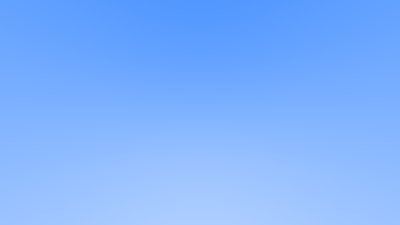

In [13]:
# Create a 2D array of lists
# The grid is a 2D array of lists, where each element of the grid is a list of 3 elements.
# ii and jj are 2D arrays containing the rows and column indices of the pixels in the image
# The size of the grid is determined by the shape of the ii array, which is assumed to be
# a two-dimensional NumPy array.
ii, jj = np.mgrid[:float(height), :float(width)]

# Create a 3D numpy array of zeros (height, width, 3 RGB channels) that is the same size as the image
# The shape of the array will be (height, width, 3)
# The '3' represents the RGB values
# u is the horizontal component of the pixel location
# v is the vertical component of the pixel location
u = (jj/(width-1)).flatten().astype(np.float32)
v = (ii/(height-1)).flatten().astype(np.float32)

# all_origins is the origin of the ray for each pixel
all_origins = origin.tile((u.size,))
# Ray direction is calculated by adding the horizontal and vertical components to the lower_left_corner
# and then subtracting the origin
r = Ray(all_origins, lower_left_corner
                     + horizontal * u
                     + vertical * v
                     - all_origins)

# Calculate the color of the rays
# The color of the rays is calculated using the ray_color function, which takes the rays as input and returns the color of the rays.
img = ray_color(r)

# Create an image from the numpy array
display(convert_to_pil(img, width, height, scale = 255.299))

## 5 Adding a Sphere

The sphere code is the same as in C++.

We modify the ray_color() function to force the red color wherever the sphere has been hit. Instead of using an *if* instruction ray-by-ray as in C++, we use *np.where* to set all rays in one go.

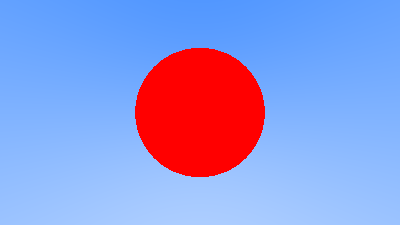

In [14]:
def hit_sphere(center, radius, rays):
    """
    Determines if a ray intersects with a sphere.

    Parameters:
    - center: The center of the sphere (tuple of x, y, z coordinates).
    - radius: The radius of the sphere (float).
    - rays: The ray to be tested for intersection (Ray object).

    Returns:
    - True if the ray intersects with the sphere, False otherwise.
    """
    oc = rays.origin - center
    a = dot(rays.direction, rays.direction)
    b = 2.0 * dot(oc, rays.direction)
    c = dot(oc, oc) - radius*radius
    discriminant = b*b - 4*a*c
    return discriminant > 0

def ray_color(rays):
    """
    Calculates the color of the rays based on their direction.

    Parameters:
    - rays: The rays to calculate the color for.

    Returns:
    - The color of the rays.
    """

    unit_direction = unit_vector(rays.direction)
    t = 0.5 * unit_direction.y + 1.0
    gradient = Color(1.0, 1.0, 1.0)*(1-t) + Color(0.5, 0.7, 1.0)*t

    sphere = hit_sphere(Point3(0,0,-1), 0.5, rays)
    gradient[np.where(sphere)] = Color(1, 0, 0)
    return gradient

img = ray_color(r)

display(convert_to_pil(img, width, height, scale = 255.299))

## 6. Surface Normals and Multiple Objects
### 6.1 Shading with Surface Normals

The *if* instruction in the new C++ *hit_sphere* function is replaced by *np.where()*.
Execution of this cell may result in a RuntimeWarning, because we are calling sqrt() on the whole frame, including where the discriminant is negative.

/var/folders/sw/fcpngc0n72zdpwblgv65nf3r0000gn/T/ipykernel_72355/3829778945.py:18: RuntimeWarning: invalid value encountered in sqrt
  root = (-b - np.sqrt(discriminant) ) / (2.0*a)


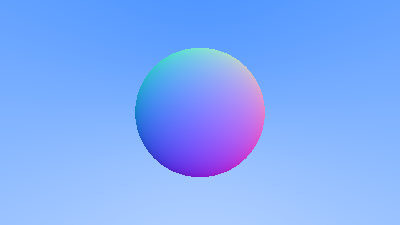

In [15]:
def hit_sphere(center, radius, rays):
    """
    Calculates the intersection points between a ray and a sphere.

    Parameters:
    - center: The center coordinates of the sphere.
    - radius: The radius of the sphere.
    - rays: The ray object containing the origin and direction of the ray.

    Returns:
    - root: The intersection point(s) between the ray and the sphere. If no intersection occurs, -1.0 is returned.
    """
    oc = rays.origin - center
    a = dot(rays.direction, rays.direction)
    b = 2.0 * dot(oc, rays.direction)
    c = dot(oc, oc) - radius*radius
    discriminant = b*b - 4*a*c
    root = (-b - np.sqrt(discriminant) ) / (2.0*a)
    return np.where(discriminant > 0, root, -1.0)

def ray_color(rays):
    """
    Calculates the color of the rays based on their direction and intersection with a sphere.

    Parameters:
    rays (Ray): The rays to calculate the color for.

    Returns:
    Color: The calculated color of the rays.
    """

    unit_direction = unit_vector(rays.direction)
    t = 0.5 * unit_direction.y + 1.0
    gradient = Color(1.0, 1.0, 1.0)*(1-t) + Color(0.5, 0.7, 1.0)*t

    t = hit_sphere(Point3(0,0,-1), 0.5, rays)
    N = unit_vector(rays.at(t) - Vec3(0, 0, -1))
    c = Color(N.x + 1, N.y + 1, N.z + 1)

    hit_rays = np.where(t > 0)
    gradient[hit_rays] = c[hit_rays] * 0.5
    return gradient

# Replicate here the relevant part of the main code (just for display)
img = ray_color(r)
display(convert_to_pil(img, width, height, scale = 255.299))


We are going to remove further warnings regarding NaNs and negative sqrt values with this setting:

In [16]:
np.seterr(invalid='ignore')   # Returns the old settings

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### 6.2 Simplifying the Ray-Sphere Intersection Code

The simplification is straightforward to replicate:

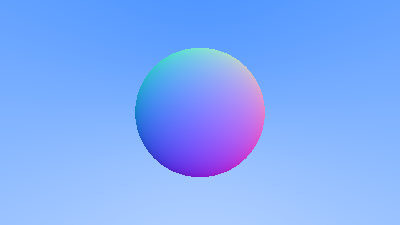

In [17]:
def hit_sphere(center, radius, rays):
    """
    Determines if a ray intersects with a sphere.

    Parameters:
    - center: The center of the sphere.
    - radius: The radius of the sphere.
    - rays: The ray to be tested for intersection.

    Returns:
    - root: The parameter value at which the ray intersects with the sphere, or -1.0 if there is no intersection.
    """
    oc = rays.origin - center
    a = length_squared(rays.direction)
    half_b = dot(oc, rays.direction)
    c = length_squared(oc) - radius*radius
    discriminant = half_b*half_b - a*c
    root = (-half_b - np.sqrt(discriminant) ) / a
    return np.where(discriminant > 0, root, -1.0)


# Replicate here the relevant part of the main code (just for display)

img = ray_color(r)
display(convert_to_pil(img, width, height, scale = 255.299))


## Intermezzo: benchmarking

It's time to see if our efforts to keep things vectorized work. Since the original image was quite small, lets make it bigger (2000 pixels width) for benchmarking purposes, otherwise the code will finish in a few milliseconds.

Image size: 2000x1125
Elapsed time: 0.094 s
Elapsed time: 0.106 s
Elapsed time: 0.103 s
Elapsed time: 0.097 s


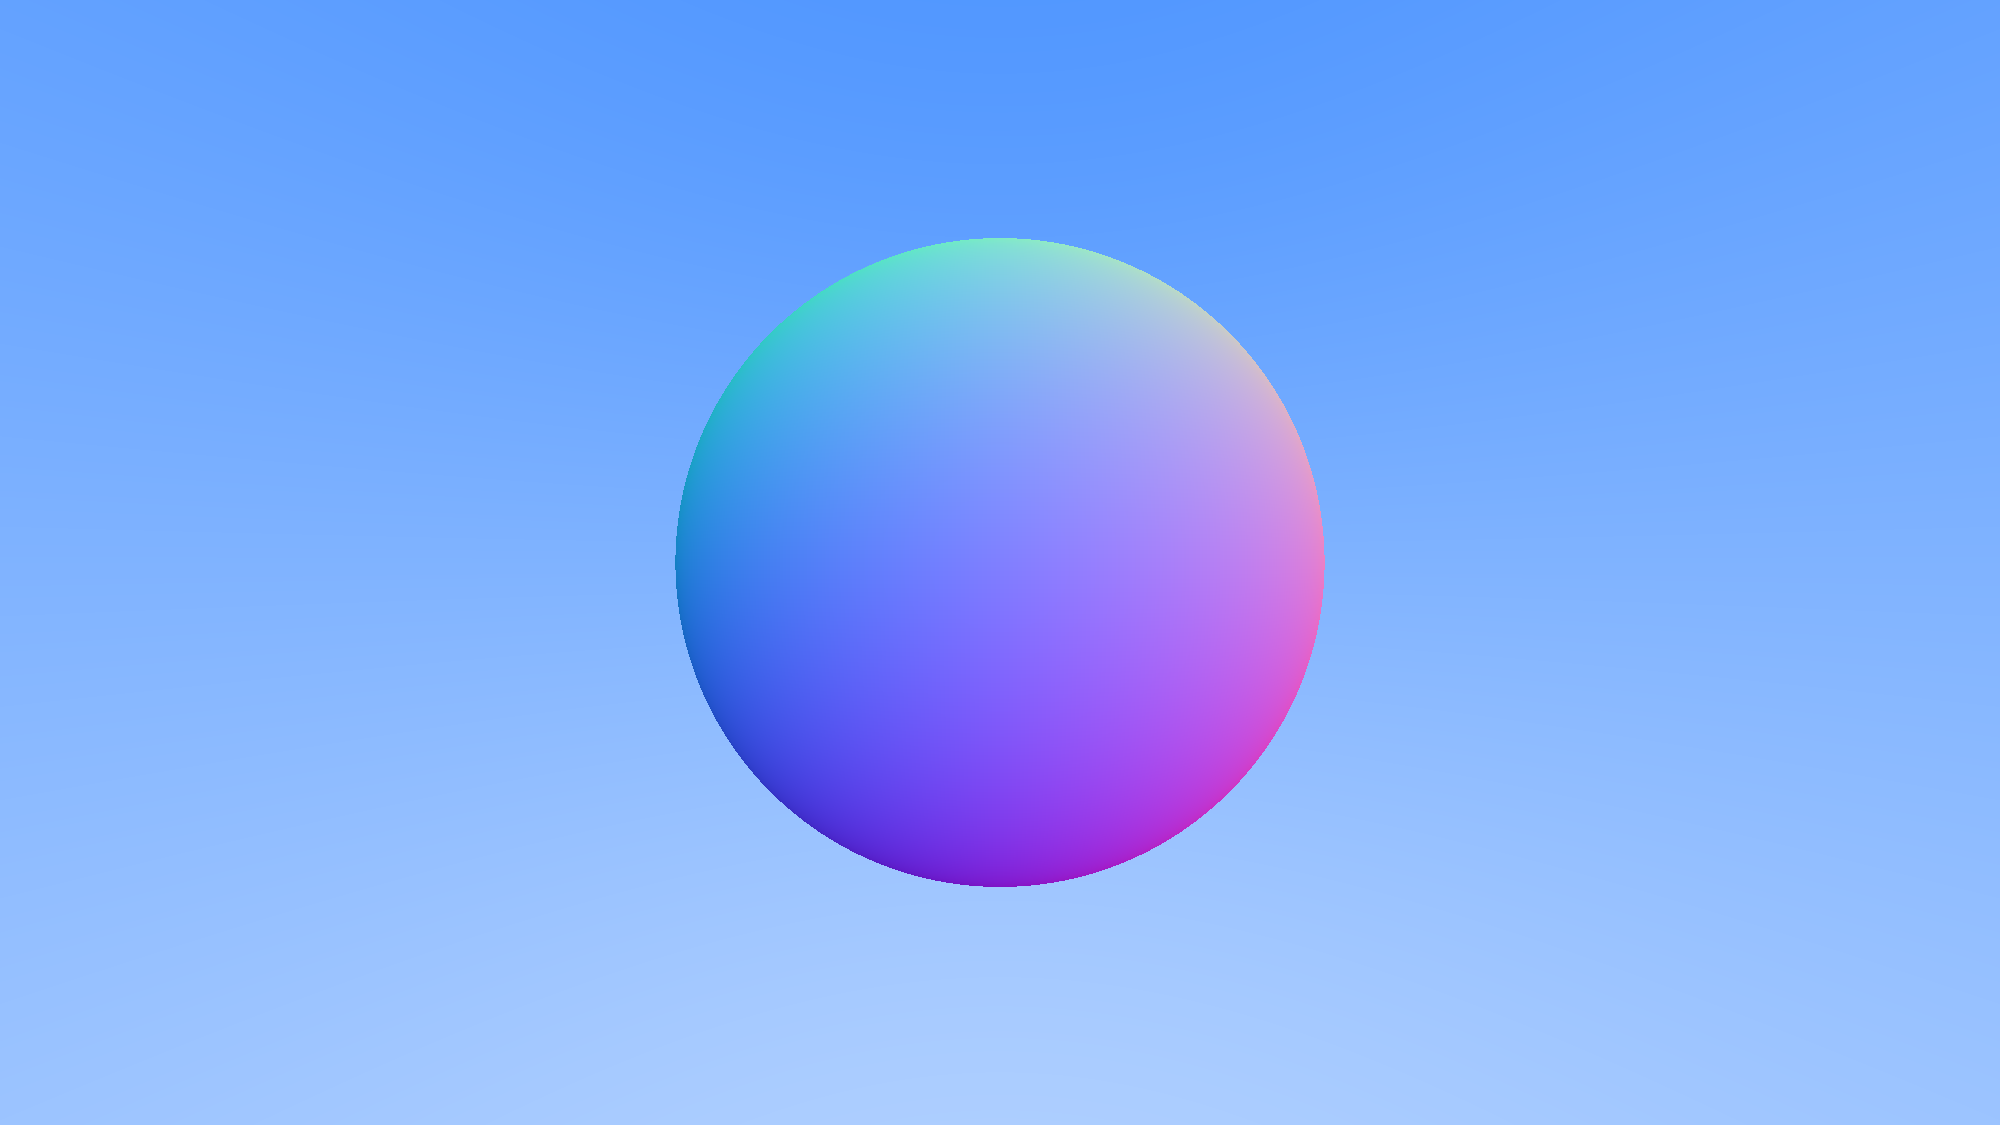

In [18]:
# Context manager for Timer synchronization

import time


class Timer:
    """
    A context manager for measuring elapsed time.

    Usage:
    with Timer():
        # Code to be timed

    The elapsed time will be printed when the context is exited.
    """

    def __enter__(self):
        self.t0 = time.time()

    def __exit__(self, *args):
        t1 = time.time()
        print('Elapsed time: %.3f s' % (t1 - self.t0))

    
def render_image(width, height):
    """
    Renders an image using ray tracing technique.

    Args:
        width (int): The width of the image.
        height (int): The height of the image.

    Returns:
        numpy.ndarray: The rendered image.
    """

    with Timer():
        ii, jj = np.mgrid[:float(height), :float(width)]

        u = (jj/(width-1)).flatten().astype(np.float32)
        v = (ii/(height-1)).flatten().astype(np.float32)

        all_origins = origin.tile((u.size,))
        r = Ray(all_origins, lower_left_corner
                             + horizontal * u
                             + vertical * v
                             - all_origins)

        img = ray_color(r)
        
    return img

def render(width, height):
    # Render the image
    # The render_image function is called with the width and height of the image as arguments.
    colors = render_image(width, height)
    image = convert_to_pil(colors, width, height)
    return image

def benchmark(benchmark_width = 2000):
    """
    Function to perform benchmarking of ray tracing.

    Parameters:
    - benchmark_width (int): The width of the benchmark image (default: 2000)

    Returns:
    None
    """
    benchmark_height = int(benchmark_width / aspect_ratio)
    print('Image size: %dx%d' % (benchmark_width, benchmark_height))

    for n in range(4):
        image = render(benchmark_width, benchmark_height)
    #image.save('img-timer.ppm')
    display(image)   
benchmark()

### 6.3 An Abstraction for Hittable Objects

The gist of the code: hit all rays on all spheres and, for each ray, remember the closest hit. Instead of looping over rays and then on all hittable objects for each ray, we are going to loop over hittable objects and, for each object, do all the rays in one go. For any hit, we check whether we are the closest hit and update a hit_record that is kept between calls.


In [19]:
from collections import namedtuple
from abc import abstractmethod

class HitRecord:
    """
    Represents a record of a ray-object intersection.

    Attributes:
        p (Vec3): The intersection point.
        normal (Vec3): The surface normal at the intersection point.
        t (np.ndarray): The parameter values of the intersection.
        front_face (np.ndarray): Indicates whether the ray hit the front face of the object.
    """

    def __init__(self, size):
        self.p = Vec3.empty(size)
        self.normal = Vec3.empty(size)
        self.t = np.full(size, np.inf, dtype=np.float32)
        self.front_face = np.zeros(size, dtype=np.float32)
        
                           
class Hittable:
    """
    Abstract base class for objects that can be hit by rays in a ray tracing simulation.
    """

    @abstractmethod
    def update_hit_record(rays, t_min, t_max, hit_record: HitRecord):
        pass

    
class Sphere(Hittable):
    """
    A class representing a sphere in a ray tracing scene.

    Attributes:
    - center: The center point of the sphere.
    - radius: The radius of the sphere.

    Methods:
    - update_hit_record(rays, t_min, t_max, hit_record): Updates the hit record with information about the intersection between the rays and the sphere.
    """
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius

    def update_hit_record(self, rays, t_min, t_max, hit_record):
        """
        Updates the hit record with information about the intersection between the rays and the sphere.

        Parameters:
        - rays: The rays to be tested for intersection.
        - t_min: The minimum value of t for a valid intersection.
        - t_max: The maximum value of t for a valid intersection.
        - hit_record: The hit record to be updated with the intersection information.
        """
        oc = rays.origin - self.center
        a = length_squared(rays.direction)
        half_b = dot(oc, rays.direction)
        c = length_squared(oc) - self.radius*self.radius
        discriminant = half_b*half_b - a*c
        
        root = np.sqrt(discriminant)
        t1 = (-half_b - root) / a
        t2 = (-half_b + root) / a
        hit1 = np.logical_and(t1 < t_max, t1 > t_min)
        hit2 = np.logical_and(t2 < t_max, t2 > t_min)
        
        # Combine the two hits, precedence to t1 (closest)
        t = np.where(hit2, t2, np.inf)
        t = np.where(hit1, t1, t)       
        
        # Detect where in the rays list we are the closest hit
        closest = np.where(t < hit_record.t)
        
        # Calculate normal
        hit_rays = rays[closest]
        
        p = hit_rays.at(t[closest])
        outward_normal = (p - self.center) / self.radius 
        front_face = dot(hit_rays.direction, outward_normal) < 0 
        normal = Vec3.where(front_face, outward_normal, -outward_normal)
        
        # Update hit records
        hit_record.p[closest] = p
        hit_record.normal[closest] = normal
        hit_record.t[closest] = t[closest]
        hit_record.front_face[closest] = front_face
        

There is not really a need for the hittable_list type. Rather, we can just loop over the world in three lines. Whenever we didn't hit anything in the world, *hit_record.t* will be infinite, and we put the gradient there.

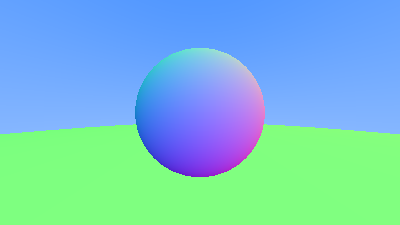

In [20]:
# Create a world with two spheres
# The world is a list of hittable objects, in this case, two spheres.
# The first sphere is centered at (0,0,-1) with a radius of 0.5, 
# and the second sphere (ground) is centered at (0,-100.5,-1) with a radius of 100 (large enough to represent the ground)
world = [
    Sphere(Point3(0,0,-1), 0.5),
    Sphere(Point3(0,-100.5,-1), 100),
]

# here we extend the previous ray_color function to take into account the hit_record
def ray_color(rays):

    unit_direction = unit_vector(rays.direction)
    t = 0.5 * unit_direction.y + 1.0
    gradient = Color(1.0, 1.0, 1.0)*(1-t) + Color(0.5, 0.7, 1.0)*t

    hit_record = HitRecord(len(rays))
    for hittable in world:
        hittable.update_hit_record(rays, 0, np.inf, hit_record)

    hits = np.where(hit_record.t != np.inf)
    hit_color = (hit_record.normal[hits] + Vec3(1,1,1)) * 0.5
    gradient[hits] = hit_color
    return gradient

img = ray_color(r)
display(convert_to_pil(img, width, height))

### Intermezzo: new benchmark
A bit slower but not by much

Image size: 2000x1125
Elapsed time: 0.180 s
Elapsed time: 0.173 s
Elapsed time: 0.177 s
Elapsed time: 0.182 s


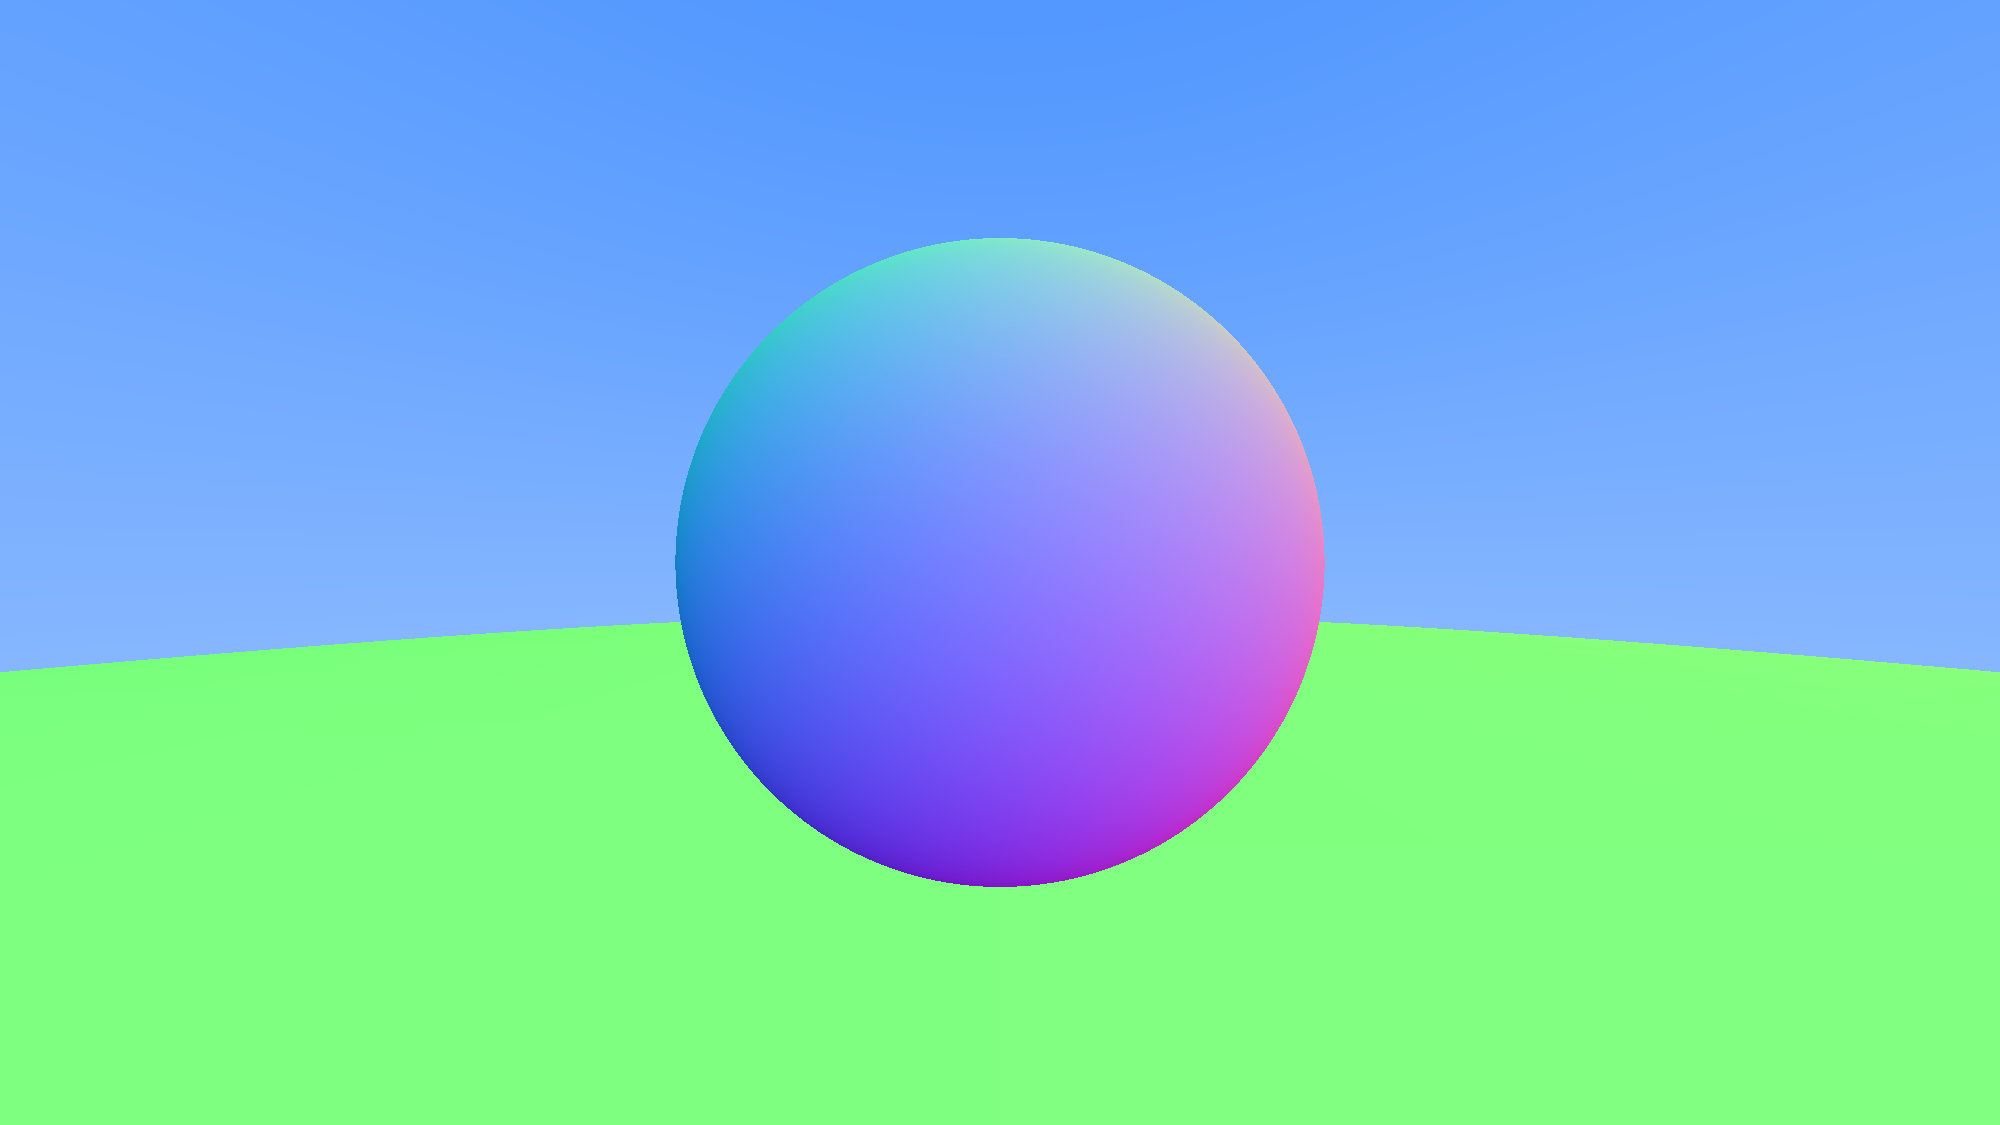

In [21]:
benchmark()

## 7. Antialiasing
### 7.1 Some Random Number Utilities


In [22]:
np.random.uniform(low=0.0, high=1.0, size=5)

array([0.64941   , 0.06994273, 0.23809434, 0.10499823, 0.16541654])

We will wrap the to have a cast to float 32bits:

In [23]:
def my_random(low, high, size):
    return np.random.uniform(low, high, size).astype(np.float32)



### 7.2 Generating Pixels with Multiple Samples

The `Camera` class just wraps the previous code into a single class definition. 

We also add a small *get_camera()* function, that will be useful later on when we will change the camera.

In [24]:
class Camera:
    """
    Represents a camera used for ray tracing.

    Attributes:
        origin (Point3): The origin point of the camera.
        horizontal (Vec3): The horizontal vector of the camera.
        vertical (Vec3): The vertical vector of the camera.
        lower_left_corner (Vec3): The lower left corner of the camera's viewport.
    """

    def __init__(self):
        aspect_ratio = 16.0 / 9.0;
        viewport_height = 2.0;
        viewport_width = aspect_ratio * viewport_height;
        focal_length = 1.0;

        self.origin = Point3(0, 0, 0);
        self.horizontal = Vec3(viewport_width, 0.0, 0.0);
        self.vertical = Vec3(0.0, -viewport_height, 0.0);
        self.lower_left_corner = (self.origin
                                  - self.horizontal/2
                                  - self.vertical/2
                                  - Vec3(0, 0, focal_length))

    def get_ray(self, u, v):
        all_origins = origin.tile((u.size,))
        return Ray(all_origins, self.lower_left_corner
                                + self.horizontal * u
                                + self.vertical * v
                                - all_origins)


def get_camera():
    return Camera()


## 8. Antialiasing

We add the samples per pixels as in the C++ book code of Chapter 8 for simplified antialiasing

In [25]:
aspect_ratio = 16.0 / 9.0
width = 400
height = int(width / aspect_ratio)
samples_per_pixel = 10    # Use just 10 values otherwise the notebook gets slow (ofcourse this highly depends on your CPU)


And modify the render_image function to add the random distribution, add the generated images together and clip the output as in the C++ code. 

Elapsed time: 0.077 s


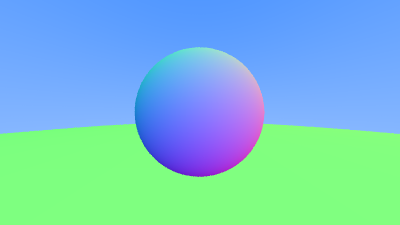

In [26]:
# update the render_image function to use the Camera class
def render_image(width, height):
    with Timer():
        ii, jj = np.mgrid[:float(height), :float(width)]

        u = (jj/(width-1)).flatten().astype(np.float32)
        v = (ii/(height-1)).flatten().astype(np.float32)

        cam = get_camera()

        img = Vec3.zeros(width * height)
        for s in range(samples_per_pixel):

            uu = u + my_random(0.0, 1.0, u.size) / (width - 1)
            vv = v + my_random(0.0, 1.0, v.size) / (height - 1)

            r = cam.get_ray(uu,vv)

            img += ray_color(r)

        # Divide the color by the number of samples for antialiasing
        img *= 1.0 / samples_per_pixel
        return img.clip(0.0, 0.999)


display(render(width, height))


## 9. Diffuse Materials
### 9.1 A Simple Diffuse Material

The C++ code uses recursion, which makes sense since it is working on single rays that are bouncing around. We are instead working with numpy arrays, so we have refactored the code into an interation based on depth.

At each iteration, the number of rays bouncing around is reduced, and so is the hit record table. The `HitRecord.index` array keeps track of where in the image the rays where originally going, so we can use their last bounce to generate the image.

This requires a major refactor of the ray_color() function.

Elapsed time: 0.306 s


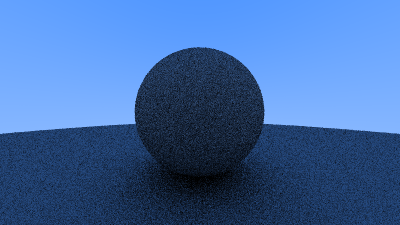

In [27]:
aspect_ratio = 16.0 / 9.0
width = 400
height = int(width / aspect_ratio)
samples_per_pixel = 10    # Use just 10 values otherwise the notebook gets too slow
max_depth = 50

class HitRecord:
    def __init__(self, n, empty=False):
        self.p           = empty or Vec3.empty(n)
        self.normal      = empty or Vec3.empty(n)
        self.t           = empty or np.full(n, np.inf, dtype=np.float32)
        self.front_face  = empty or np.zeros(n, dtype=np.float32)
        self.index       = empty or np.arange(n, dtype=np.int32)

    def __getitem__(self, idx):
        other = HitRecord(len(idx), empty=True)
        other.p          = self.p[idx]
        other.normal     = self.normal[idx]
        other.t          = self.t[idx]
        other.front_face = self.front_face[idx]
        other.index      = self.index[idx]
        return other
    
    
def random_in_unit_sphere(n):
    '''Generate random Vec3 arrays in batches and keep the ones inside the unit sphere'''

    values = Vec3.zeros(0)

    while len(values) < n:
        random_values = Vec3(my_random(-1.0, 1.0, n), my_random(-1.0, 1.0, n), my_random(-1.0, 1.0, n))
        good_ones = length_squared(random_values) < 1
        values.append(random_values[good_ones])
        
    return values[np.arange(n)]


def ray_color(rays):
    '''Iterative version of ray_color'''

    frame_intensity = np.full(len(rays), 1.0, dtype=np.float32)
    frame_rays = rays
    hit_record = HitRecord(len(rays))

    for d in range(max_depth):

        # Initialize all distances to infinite
        hit_record.t.fill(np.inf)
        for hittable in world:
            hittable.update_hit_record(rays, 0, np.inf, hit_record)

        # Rays that have hit something will be used in the next iteration
        hit_idx = np.where(hit_record.t != np.inf)[0]

        if len(hit_idx) > 0:

            # Narrow down the hit record and calculate new rays
            hit_record = hit_record[hit_idx]
            
            target = (hit_record.p
                      + hit_record.normal
                      + random_in_unit_sphere(len(hit_idx)))

            rays = Ray(hit_record.p, target - hit_record.p)

            # Update global arrays
            frame_rays.direction[hit_record.index] = rays.direction
            frame_intensity[hit_record.index] *= 0.5 

        else:
            break

    unit_direction = unit_vector(frame_rays.direction)
    t = 0.5 * unit_direction.y + 1.0
    img = (Color(1.0, 1.0, 1.0) * (1 - t) + Color(0.5, 0.7, 1.0) * t) * frame_intensity

    return img


display(render(width, height))


### 9.2 Using Gamma Correction for Accurate Color Intensity


Gamma correction goes into our get_image() function.

Elapsed time: 0.310 s


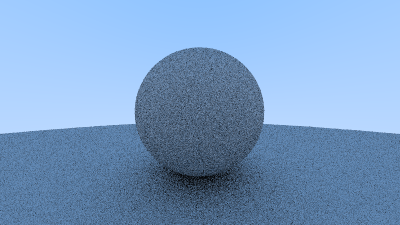

In [28]:

# refactor the render_image function to use gamma correction
def render_image(width, height):
    with Timer():
        ii, jj = np.mgrid[:float(height), :float(width)]

        u = (jj/(width-1)).flatten().astype(np.float32)
        v = (ii/(height-1)).flatten().astype(np.float32)

        cam = get_camera()

        img = Vec3.zeros(width * height)
        for s in range(samples_per_pixel):

            uu = u + my_random(0.0, 1.0, u.size) / (width - 1)
            vv = v + my_random(0.0, 1.0, v.size) / (height - 1)

            r = cam.get_ray(uu,vv)

            img += ray_color(r)

        img *=  1.0 / samples_per_pixel
        img.x = np.sqrt(img.x)
        img.y = np.sqrt(img.y)
        img.z = np.sqrt(img.z)
        img = img.clip(0.0, 0.999)

    return img


display(render(width, height))


### 9.3 Fixing shadow acne
We change the t_min  from 0 to 0.001

Elapsed time: 0.224 s


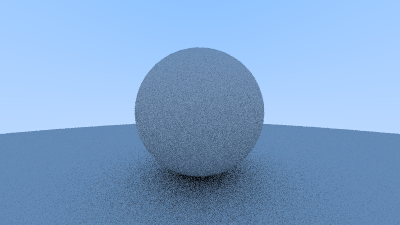

In [29]:

def ray_color(rays):
    '''Iterative version of ray_color'''

    frame_intensity = np.full(len(rays), 1.0, dtype=np.float32)
    frame_rays = rays
    hit_record = HitRecord(len(rays))

    for d in range(max_depth):

        # Initialize all distances to infinite and propagate all rays
        hit_record.t.fill(np.inf)
        for hittable in world:
            hittable.update_hit_record(rays, 0.001, np.inf, hit_record)   # Changed here

        # Rays that have hit something will be used in the next iteration
        hit_idx = np.where(hit_record.t != np.inf)[0]

        if len(hit_idx) > 0:

            # Narrow down the hit record and calculate new rays
            hit_record = hit_record[hit_idx]
            
            target = (hit_record.p
                      + hit_record.normal
                      + random_in_unit_sphere(len(hit_idx)))

            rays = Ray(hit_record.p, target - hit_record.p)

            # Update global arrays
            frame_rays.direction[hit_record.index] = rays.direction
            frame_intensity[hit_record.index] *= 0.5 

        else:
            break

    unit_direction = unit_vector(frame_rays.direction)
    t = 0.5 * unit_direction.y + 1.0
    img = (Color(1.0, 1.0, 1.0) * (1 - t) + Color(0.5, 0.7, 1.0) * t) * frame_intensity

    return img

display(render(width, height))



### 9.4 True Lambertian Reflection
We follow the C++ code of Chpater 9, changing the random_unit_vector() function to generate N arrays in one call:

Elapsed time: 0.172 s


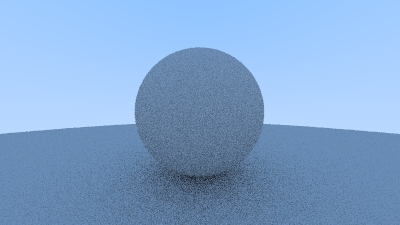

In [30]:

def random_unit_vectors(n):
    a = my_random(0.0, 2.0*np.pi, n)
    z = my_random(-1.0, 1.0, n)
    r = np.sqrt(1 - z*z)
    return Vec3(r*np.cos(a), r*np.sin(a), z)

def ray_color(rays):
    '''Iterative version of ray_color'''

    frame_intensity = np.full(len(rays), 1.0, dtype=np.float32)
    frame_rays = rays
    hit_record = HitRecord(len(rays))

    for d in range(max_depth):

        # Initialize all distances to infinite and propagate all rays
        hit_record.t.fill(np.inf)
        for hittable in world:
            hittable.update_hit_record(rays, 0.001, np.inf, hit_record) 

        # Rays that have hit something will be used in the next iteration
        hit_idx = np.where(hit_record.t != np.inf)[0]

        if len(hit_idx) > 0:

            # Narrow down the hit record and calculate new rays
            hit_record = hit_record[hit_idx]
            
            target = (hit_record.p
                      + hit_record.normal
                      + random_unit_vectors(len(hit_idx)))     # Changed here

            rays = Ray(hit_record.p, target - hit_record.p)

            # Update global arrays
            frame_rays.direction[hit_record.index] = rays.direction
            frame_intensity[hit_record.index] *= 0.5 

        else:
            break

    unit_direction = unit_vector(frame_rays.direction)
    t = 0.5 * unit_direction.y + 1.0
    img = (Color(1.0, 1.0, 1.0) * (1 - t) + Color(0.5, 0.7, 1.0) * t) * frame_intensity

    return img


display(render(width, height))


## 10 Metal
### 10.2 A Data Structure to Describe Ray-Object Intersections

We now have a Material abstract class and a material field in the HitRecord, updated by the Sphere field whenever there is a hit. We add just two lines to the Sphere class.


In [31]:
import numpy as np

ScatterResult = namedtuple('ScatterResult', 'attenuation rays is_scattered')

class Material:
    def scatter(r_in: Ray, ray_idx, rec: HitRecord) -> ScatterResult:
        pass

class HitRecord:
    def __init__(self, n, empty=False):
        self.p           = empty or Vec3.empty(n)
        self.normal      = empty or Vec3.empty(n)
        self.t           = empty or np.full(n, np.inf, dtype=np.float32)
        self.front_face  = empty or np.zeros(n, dtype=np.float32)
        self.index       = empty or np.arange(n, dtype=np.int32)
        self.material_id = empty or np.zeros(n, dtype=np.int64)

    def __getitem__(self, idx):
        other = HitRecord(len(idx), empty=True)
        other.p           = self.p[idx]
        other.normal      = self.normal[idx]
        other.t           = self.t[idx]
        other.front_face  = self.front_face[idx]
        other.index       = self.index[idx]
        other.material_id = self.material_id[idx]
        return other


class Sphere(Hittable):
    '''A hittable sphere that knows how to update the hit record'''

    def __init__(self, center, radius, material):
        self.center = center
        self.radius = radius
        self.material = material                 # Changed here

    def update_hit_record(self, rays, t_min, t_max, hit_record):

        oc = rays.origin - self.center
        a = length_squared(rays.direction)
        half_b = dot(oc, rays.direction)
        c = length_squared(oc) - self.radius*self.radius
        discriminant = half_b*half_b - a*c
        
        root = np.sqrt(discriminant)
        t1 = (-half_b - root) / a
        t2 = (-half_b + root) / a
        hit1 = np.logical_and(t1 < t_max, t1 > t_min)
        hit2 = np.logical_and(t2 < t_max, t2 > t_min)
        
        # Combine the two hits, precedence to t1 (closest)
        t = np.where(hit2, t2, np.inf)
        t = np.where(hit1, t1, t)       
        
        # Detect where in the rays list we are the closest hit
        closest = np.where(t < hit_record.t)
        
        # Early exit if nothing hit
        if len(closest[0]) == 0:
            return
        
        # Calculate normal
        hit_rays = rays[closest]
        
        p = hit_rays.at(t[closest])
        outward_normal = (p - self.center) / self.radius 
        front_face = dot(hit_rays.direction, outward_normal) < 0 
        normal = Vec3.where(front_face, outward_normal, -outward_normal)
        
        # Update hit record
        hit_record.p[closest] = p
        hit_record.normal[closest] = normal
        hit_record.t[closest] = t[closest]
        hit_record.front_face[closest] = front_face
        hit_record.material_id[closest] = id(self.material)                 # Changed here

    

### 10.3 Modeling Light Scatter and Reflectance


In [32]:
class Lambertian(Material):
    
    def __init__(self, albedo: Color):
        self.albedo = albedo
    
    def scatter(self, r_in: Ray, rec: HitRecord) -> ScatterResult:

        scatter_direction = rec.normal + random_unit_vectors(len(r_in))
        scattered = Ray(rec.p, scatter_direction)
        
        return ScatterResult(attenuation = self.albedo,
                             rays = scattered,
                             is_scattered = np.full(len(r_in), True, dtype=bool))


### 10.4 Mirrored Light Reflection
Adding the Metal class, and rewriting ray_color() to use the new materials. Since we cannot call the material subroutine pixel-by-pixel, we'll calculate all possible materials for all rays in a given iteration, and select among those to update the rays.

In [33]:
def reflect(v, n):
    return v - n*2*dot(v, n)

class Metal(Material):

    def __init__(self, albedo: Color):
        self.albedo = albedo
        
    def scatter(self, r_in: Ray, rec: HitRecord) -> ScatterResult:

        reflected = reflect(unit_vector(r_in.direction), rec.normal)
        scattered = Ray(rec.p, reflected);

        return ScatterResult(attenuation = self.albedo,
                             rays = scattered,
                             is_scattered = dot(scattered.direction, rec.normal) > 0)  


def ray_color(rays):
    '''Iterative version with materials'''

    frame_intensity = Vec3.ones(len(rays))
    frame_rays = rays
    hit_record = HitRecord(len(rays))

    materials = set([x.material for x in world])

    for d in range(max_depth):

        # Initialize all distances to infinite and propagate all rays
        hit_record.t.fill(np.inf)
        hit_record.material_id.fill(0)
        for hittable in world:
            hittable.update_hit_record(rays, 0.001, np.inf, hit_record)         
            
        for material in materials:

            material_hits = np.where(hit_record.material_id == id(material))[0]
            if len(material_hits) == 0:
                continue

            my_rays = rays[material_hits]
            my_rec = hit_record[material_hits]
            result = material.scatter(my_rays, my_rec)         
            
            # All rays have done something
            rays[material_hits] = result.rays
            frame_rays.direction[my_rec.index] = result.rays.direction
                
            intensity = result.attenuation.multiply(frame_intensity[my_rec.index])
            intensity[np.where(~result.is_scattered)] = Vec3(0,0,0)

            frame_intensity[my_rec.index] = intensity

            # Those that have been scattered stop here
            not_scattered_material_idx = material_hits[~result.is_scattered]
            hit_record.t[not_scattered_material_idx] = np.inf
            
        # Iterate with those rays that have been scattered by something
        scattered_rays = np.where(hit_record.t != np.inf)[0]
        rays = rays[scattered_rays]
        hit_record = hit_record[scattered_rays]

        if len(rays) == 0:
            break
            
    unit_direction = unit_vector(frame_rays.direction)
    t = 0.5 * unit_direction.y + 1.0
    img = (Color(1.0, 1.0, 1.0) * (1 - t) + Color(0.5, 0.7, 1.0) * t).multiply(frame_intensity)

    return img

### 10.5 A Scene with Metal Spheres

Elapsed time: 0.460 s


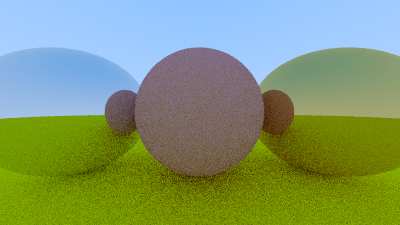

In [34]:
material_ground = Lambertian(Color(0.8, 0.8, 0.0))
material_center = Lambertian(Color(0.7, 0.3, 0.3))
material_left   = Metal(Color(0.8, 0.8, 0.8))
material_right  = Metal(Color(0.8, 0.6, 0.2))

world = [
    Sphere(Point3( 0.0, -100.5, -1.0), 100.0, material_ground),
    Sphere(Point3( 0.0,    0.0, -1.0),   0.5, material_center),
    Sphere(Point3(-1.0,    0.0, -1.0),   0.5, material_left),
    Sphere(Point3( 1.0,    0.0, -1.0),   0.5, material_right),
]


display(render(width, height))


### 10.6 Fuzzy Reflection


Elapsed time: 0.501 s


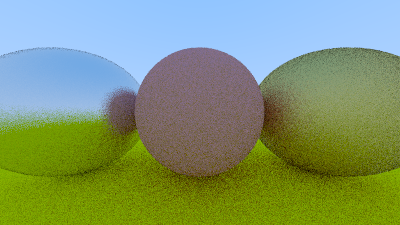

In [35]:
class Metal(Material):

    def __init__(self, albedo: Color, f):
        self.albedo = albedo
        self.fuzz = f if f < 1 else 1
        
    def scatter(self, r_in: Ray, rec: HitRecord) -> ScatterResult:

        reflected = reflect(unit_vector(r_in.direction), rec.normal)
        scattered = Ray(rec.p, reflected + random_in_unit_sphere(len(r_in))*self.fuzz)

        return ScatterResult(attenuation = self.albedo,
                             rays = scattered,
                             is_scattered = dot(scattered.direction, rec.normal) > 0)    

material_left   = Metal(Color(0.8, 0.8, 0.8), 0.3)
material_right  = Metal(Color(0.8, 0.6, 0.2), 1.0)

world = [
    Sphere(Point3( 0.0, -100.5, -1.0), 100.0, material_ground),
    Sphere(Point3( 0.0,    0.0, -1.0),   0.5, material_center),
    Sphere(Point3(-1.0,    0.0, -1.0),   0.5, material_left),
    Sphere(Point3( 1.0,    0.0, -1.0),   0.5, material_right),
]

display(render(width, height))


## 11. Dielectrics
Here we calculate both reflection and refraction for all rays. It's inefficient but easier to write, and profiling shows that we are spending little time in this function anyway.

Elapsed time: 0.663 s


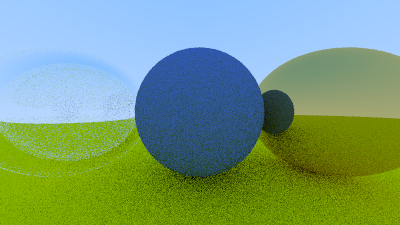

In [36]:

def refract(uv, n, etai_over_etat):
    
    cos_theta = dot(-uv, n)
    r_out_perp = (uv + n*cos_theta) * etai_over_etat
    r_out_parallel = n * (-np.sqrt(np.abs(1.0 - length_squared(r_out_perp))))
    return r_out_perp + r_out_parallel

def schlick(cosine, ref_idx):
    r0 = (1 - ref_idx) / (1 + ref_idx)
    r0 = r0 * r0
    return r0 + (1 - r0) * (1 - cosine)**5


class Dielectric(Material):
    
    def __init__(self, ref_idx):
        self.ref_idx = ref_idx

    def scatter(self, r_in: Ray, rec: HitRecord) -> ScatterResult:
        
        etai_over_etat = np.where(rec.front_face, 1.0 / self.ref_idx, self.ref_idx)
        
        unit_direction = unit_vector(r_in.direction)
        
        ## Reflection/refraction choice: calculate both and choose later
        cos_theta = np.fmin(dot(-unit_direction, rec.normal), 1.0)
        sin_theta = np.sqrt(1.0 - cos_theta*cos_theta)
        reflected = reflect(unit_direction, rec.normal)
        refracted = refract(unit_direction, rec.normal, etai_over_etat)

        reflected_rays = Ray(rec.p, reflected)
        refracted_rays = Ray(rec.p, refracted)

        reflect_prob = schlick(cos_theta, etai_over_etat)
        random_floats = my_random(0.0, 1.0, len(reflect_prob))

        must_reflect = (etai_over_etat * sin_theta > 1.0)
        again_reflect = (random_floats < reflect_prob)

        all_reflect = np.where(np.logical_or(must_reflect, again_reflect))
        
        refracted_rays[all_reflect] = reflected_rays[all_reflect]
        
        return ScatterResult(attenuation = Color(1.0, 1.0, 1.0),
                             rays = refracted_rays,
                             is_scattered = np.full(len(r_in), True, dtype=bool))


material_ground = Lambertian(Color(0.8, 0.8, 0.0))
material_center = Lambertian(Color(0.1, 0.2, 0.5));
material_left   = Dielectric(1.5)
material_right  = Metal(Color(0.8, 0.6, 0.2), 0.0)

world = [
    Sphere(Point3( 0.0, -100.5, -1.0), 100.0, material_ground),
    Sphere(Point3( 0.0,    0.0, -1.0),   0.5, material_center),
    Sphere(Point3(-1.0,    0.0, -1.0),   0.5, material_left),
    Sphere(Point3(-1.0,    0.0, -1.0),  -0.4, material_left),
    Sphere(Point3( 1.0,    0.0, -1.0),   0.5, material_right),
]

display(render(width, height))


## 12. Positionable Camera



Following chapter 12.1 of the book to setup a Camera vertical field of view and aspect ratio. We also add a function to move the camera around. 
We test these new features by rendering a scene with a camera that is not at the origin and a simnple scene with a single of two touching spheres using a 90 degree vertical field of view.

Elapsed time: 0.238 s


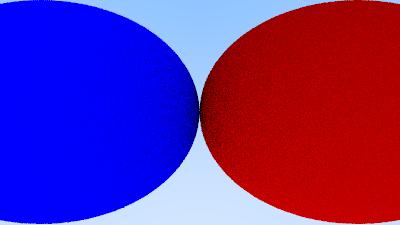

In [37]:

class Camera:

    def __init__(self, vfov,           # vertical field-of-view in degrees
                       aspect_ratio):

        theta = np.deg2rad(vfov)
        h = np.tan(theta/2)
        viewport_height = 2.0 * h;
        viewport_width = aspect_ratio * viewport_height;
        focal_length = 1.0;

        self.origin = Point3(0, 0, 0);
        self.horizontal = Vec3(viewport_width, 0.0, 0.0);
        self.vertical = Vec3(0.0, -viewport_height, 0.0);
        self.lower_left_corner = (self.origin
                                    - self.horizontal/2
                                    - self.vertical/2
                                    - Vec3(0, 0, focal_length))

    def get_ray(self, u, v):
        all_origins = origin.tile((u.size,))
        return Ray(all_origins, self.lower_left_corner
                                + self.horizontal * u
                                + self.vertical * v
                                - all_origins)

R = np.cos(np.pi/4);

material_left   = Lambertian(Color(0, 0, 1))
material_right  = Lambertian(Color(1, 0, 0))

world = [
    Sphere(Point3(-R, 0, -1), R, material_left),
    Sphere(Point3( R, 0, -1), R, material_right),
]


def get_camera():
    return Camera(90.0, aspect_ratio)


display(render(width, height))


We add `lookat`, `lookfrom` and `vup`points and vectors to the Camera class.

Elapsed time: 0.632 s


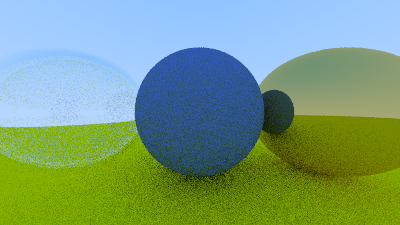

In [38]:
class Camera:

    def __init__(self, lookfrom,
                       lookat,
                       vup,
                       vfov,           # vertical field-of-view in degrees
                       aspect_ratio):

        theta = np.deg2rad(vfov)
        h = np.tan(theta/2)
        viewport_height = 2.0 * h;
        viewport_width = aspect_ratio * viewport_height;

        w = unit_vector(lookfrom - lookat)
        u = cross(vup, w)
        v = -cross(w, u)           # Minus here, to have things looking upright

        self.origin = lookfrom
        self.horizontal = u * viewport_width
        self.vertical = v * viewport_height
        self.lower_left_corner = self.origin - self.horizontal/2 - self.vertical/2 - w

    def get_ray(self, s, t):
        all_origins = self.origin.tile((s.size,))
        return Ray(all_origins, self.lower_left_corner
                                + self.horizontal * s
                                + self.vertical * t
                                - all_origins)



def get_camera():
    return Camera(lookfrom = Point3(0,0,0),
                  lookat   = Point3(0,0,-1),
                  vup      = Vec3(0,1,0),
                  vfov     = 90,
                  aspect_ratio = aspect_ratio)

material_ground = Lambertian(Color(0.8, 0.8, 0.0))
material_center = Lambertian(Color(0.1, 0.2, 0.5));
material_left   = Dielectric(1.5)
material_right  = Metal(Color(0.8, 0.6, 0.2), 0.0)

world = [
    Sphere(Point3( 0.0, -100.5, -1.0), 100.0, material_ground),
    Sphere(Point3( 0.0,    0.0, -1.0),   0.5, material_center),
    Sphere(Point3(-1.0,    0.0, -1.0),   0.5, material_left),
    Sphere(Point3(-1.0,    0.0, -1.0),  -0.45, material_left),
    Sphere(Point3( 1.0,    0.0, -1.0),   0.5, material_right),
]

display(render(width, height))


use another viewpoint for the two spheres scene, and add a ground plane to the scene.

Elapsed time: 0.365 s


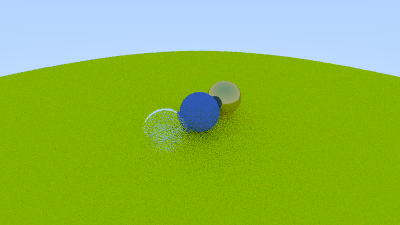

In [39]:
def get_camera():
    return Camera(lookfrom = Point3(-2,2,1),
                  lookat   = Point3(0,0,-1),
                  vup      = Vec3(0,1,0),
                  vfov      = 90,
                  aspect_ratio = aspect_ratio)

display(render(width, height))


and also change the vofv to 20:

Elapsed time: 0.752 s


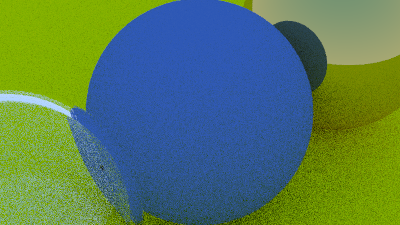

In [40]:

def get_camera():
    return Camera(lookfrom = Point3(-2,2,1),
                  lookat   = Point3(0,0,-1),
                  vup      = Vec3(0,1,0),
                  vfov      = 20,
                  aspect_ratio = aspect_ratio)

display(render(width, height))

## 13. Defocus Blur
Adding the thin lens approximation to the camera, and a defocus blur to the render_image function according to chapter 13 of the book to render spheres with depth-of-field blur cinematic effects. 

Elapsed time: 0.702 s


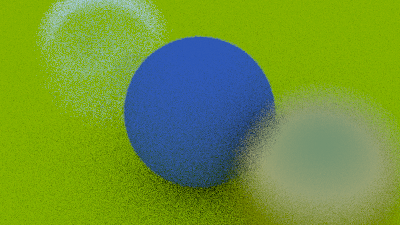

In [41]:
def random_in_unit_disk(n):
    ''''Generate random Vec3 arrays in batches and keep the ones inside the unit disk'''

    values = Vec3.zeros(0)

    while len(values) < n:
        random_values = Vec3(my_random(-1.0, 1.0, n), my_random(-1.0, 1.0, n), np.zeros(n))
        good_ones = length_squared(random_values) < 1
        values.append(random_values[good_ones])
    
    return values[:n]


class Camera:

    def __init__(self, lookfrom: Vec3,
                       lookat: Vec3,
                       vup: Vec3,
                       vfov: float,           # vertical field-of-view in degrees
                       aspect_ratio: float,
                       aperture: float,
                       focus_dist: float):

        theta = np.deg2rad(vfov)
        h = np.tan(theta/2)
        viewport_height = 2.0 * h;
        viewport_width = aspect_ratio * viewport_height;

        w = unit_vector(lookfrom - lookat)
        u = cross(vup, w)
        v = -cross(w, u)           # Minus here, to have things looking upright

        self.origin = lookfrom
        self.horizontal = u * viewport_width * focus_dist
        self.vertical = v * viewport_height * focus_dist
        self.lower_left_corner = self.origin - self.horizontal/2 - self.vertical/2 - w*focus_dist
        self.lens_radius = aperture / 2
        self.u = u
        self.v = v

    def get_ray(self, s, t):
        all_origins = self.origin.tile((s.size,))
        rd = random_in_unit_disk(s.size) * self.lens_radius
        offset = self.u * rd.x + self.v * rd.y

        return Ray(all_origins + offset, self.lower_left_corner
                                         + self.horizontal * s
                                         + self.vertical * t
                                         - all_origins - offset)
    
def get_camera():
    lookfrom = Point3(3,3,2)
    lookat = Point3(0,0,-1)
    
    return Camera(lookfrom = lookfrom,
                  lookat   = lookat,
                  vup      = Vec3(0,1,0),
                  vfov     = 20,
                  aspect_ratio = 16/9,
                  aperture = 2.0,
                  focus_dist = length(lookfrom-lookat))

display(render(width, height))

## 13. Final render
This cell is set to "Markdown" instead of "Code", because it takes up to several minutes to run and it could slow-down/hang your notebook.

It generates a scene with 3 large spheres, 20 random spheres and a ground plane, and renders it with a defocus blur. The scene is illuminated by a single point light source. The camera is positioned at a slight angle to the scene, and the vertical field of view is set to 20 degrees. 

```python
def random_double(low=0.0, high=1.0):
    return np.random.uniform(low, high, 1).astype(np.float32)

def vec3_random(low=0.0, high=1.0):
    r = my_random(low, high, size=3)
    return Vec3(r[0], r[1], r[2])


ground_material = Lambertian(Color(0.5, 0.5, 0.5))

world = []
world.append(Sphere(Point3(0, -1000, 0), 1000, ground_material))

for a in range(-11, 11):
    for b in range(-11, 11):
        choose_mat = random_double()
        center = Point3(a + 0.9*random_double(), 0.2, b + 0.9*random_double())

        if length(center - Point3(4, 0.2, 0)) > 0.9:

            if choose_mat < 0.8:
                ## diffuse
                albedo = vec3_random().multiply(vec3_random())
                sphere_material = Lambertian(albedo)
                world.append(Sphere(center, 0.2, sphere_material))

            elif choose_mat < 0.95:
                ## metal
                albedo = vec3_random(0.5, 1)
                fuzz = random_double(0, 0.5)
                sphere_material = Metal(albedo, fuzz)
                world.append(Sphere(center, 0.2, sphere_material))

            else:
                ## glass
                sphere_material = Dielectric(1.5)
                world.append(Sphere(center, 0.2, sphere_material))


world.append(Sphere(Point3( 0, 1, 0), 1.0, Dielectric(1.5)))
world.append(Sphere(Point3(-4, 1, 0), 1.0, Lambertian(Color(0.4, 0.2, 0.1))))
world.append(Sphere(Point3( 4, 1, 0), 1.0, Metal(Color(0.7, 0.6, 0.5), 0.0)))

image_width = 1000
aspect_ratio = 3/2
image_height = int(image_width / aspect_ratio)
samples_per_pixel = 3 #  For a realistic image you need to set this to 500
max_depth = 50

def get_camera():
    lookfrom = Point3(13,2,3)
    lookat = Point3(0,0,0)
    
    return Camera(lookfrom = lookfrom,
                  lookat   = lookat,
                  vup      = Vec3(0,1,0),
                  vfov     = 20,
                  aspect_ratio = aspect_ratio,
                  aperture     = 0.1,
                  focus_dist   = 10.0)

display(render(image_width, image_height))
```

### here it is below if you want to try it out ;-)
#### (**39secs** on Apple silicon M1 Max with 3 samples per pixel):

Elapsed time: 36.208 s


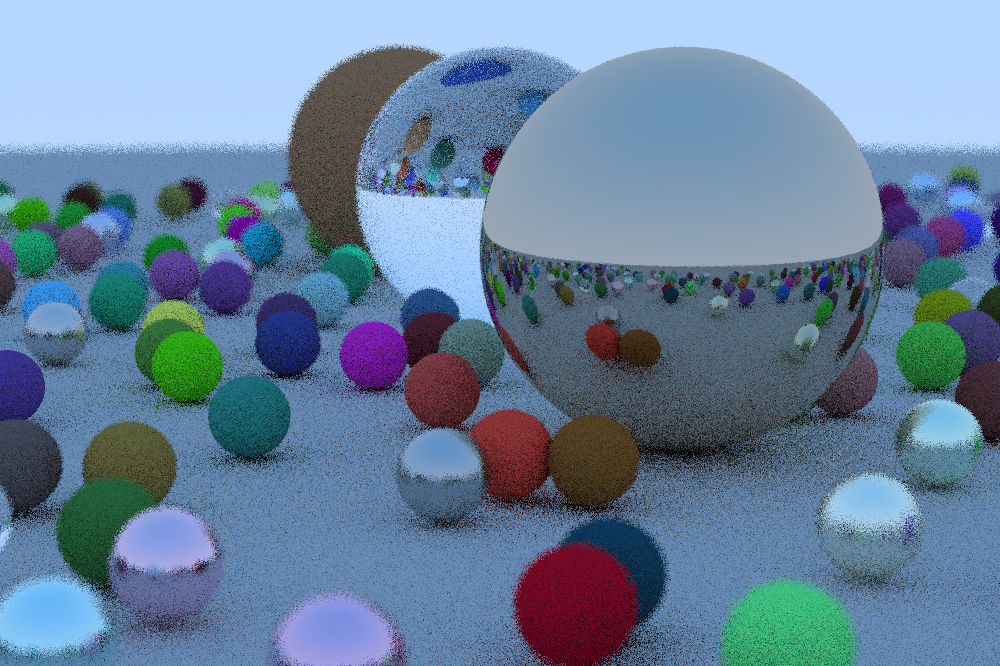

In [42]:

def random_double(low=0.0, high=1.0):
    return np.random.uniform(low, high, 1).astype(np.float32)

def vec3_random(low=0.0, high=1.0):
    r = my_random(low, high, size=3)
    return Vec3(r[0], r[1], r[2])


ground_material = Lambertian(Color(0.5, 0.5, 0.5))

world = []
world.append(Sphere(Point3(0, -1000, 0), 1000, ground_material))

for a in range(-11, 11):
    for b in range(-11, 11):
        choose_mat = random_double()
        center = Point3(a + 0.9*random_double(), 0.2, b + 0.9*random_double())

        if length(center - Point3(4, 0.2, 0)) > 0.9:

            if choose_mat < 0.8:
                ## diffuse
                albedo = vec3_random().multiply(vec3_random())
                sphere_material = Lambertian(albedo)
                world.append(Sphere(center, 0.2, sphere_material))

            elif choose_mat < 0.95:
                ## metal
                albedo = vec3_random(0.5, 1)
                fuzz = random_double(0, 0.5)
                sphere_material = Metal(albedo, fuzz)
                world.append(Sphere(center, 0.2, sphere_material))

            else:
                ## glass
                sphere_material = Dielectric(1.5)
                world.append(Sphere(center, 0.2, sphere_material))


world.append(Sphere(Point3( 0, 1, 0), 1.0, Dielectric(1.5)))
world.append(Sphere(Point3(-4, 1, 0), 1.0, Lambertian(Color(0.4, 0.2, 0.1))))
world.append(Sphere(Point3( 4, 1, 0), 1.0, Metal(Color(0.7, 0.6, 0.5), 0.0)))

image_width = 1000
aspect_ratio = 3/2
image_height = int(image_width / aspect_ratio)
samples_per_pixel = 3 #  For a realistic image you need to set this to 500
max_depth = 50

def get_camera():
    lookfrom = Point3(13,2,3)
    lookat = Point3(0,0,0)
    
    return Camera(lookfrom = lookfrom,
                  lookat   = lookat,
                  vup      = Vec3(0,1,0),
                  vfov     = 20,
                  aspect_ratio = aspect_ratio,
                  aperture     = 0.1,
                  focus_dist   = 10.0)

display(render(image_width, image_height))

## Appendix: Python Optimizations
Our render works, but is very slow. We'll try to make it faster.



### length_squared()
One of the heaviest used functions is length_squared(). We'll cache the most common usage, before calling update_hit_record(), using the property decorator. This optimization alone makes the overall render about 10% faster.

Elapsed time: 7.251 s


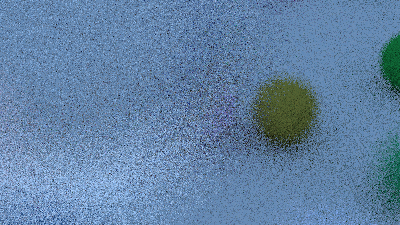

In [43]:
class Ray:
    def __init__(self, origin, direction):
        self.origin = origin
        self.direction = direction
        self._direction_length_squared = None

    def at(self, t):
        return self.origin + self.direction*t
    
    def __getitem__(self, idx):
        return Ray(self.origin[idx], self.direction[idx])

    def __setitem__(self, idx, other):
        self.origin[idx] = other.origin
        self.direction[idx] = other.direction
        self._direction_length_squared = None

    def __len__(self):
        return self.origin.x.size
    
    def direction_length_squared(self):
        if self._direction_length_squared is None:
            self._direction_length_squared = length_squared(self.direction)
        return self._direction_length_squared


class Sphere(Hittable):
    '''A hittable sphere that knows how to update the hit record'''

    def __init__(self, center, radius, material):
        self.center = center
        self.radius = radius
        self.material = material

    def update_hit_record(self, rays, t_min, t_max, hit_record):

        oc = rays.origin - self.center
        a = rays.direction_length_squared()                    # Changed here
        half_b = dot(oc, rays.direction)
        c = length_squared(oc) - self.radius*self.radius
        discriminant = half_b*half_b - a*c
        
        root = np.sqrt(discriminant)
        t1 = (-half_b - root) / a
        t2 = (-half_b + root) / a
        hit1 = np.logical_and(t1 < t_max, t1 > t_min)
        hit2 = np.logical_and(t2 < t_max, t2 > t_min)
        
        # Combine the two hits, precedence to t1 (closest)
        t = np.where(hit2, t2, np.inf)
        t = np.where(hit1, t1, t)       
        
        # Detect where in the rays list we are the closest hit
        closest = np.where(t < hit_record.t)
        
        # Early exit if nothing hit
        if len(closest[0]) == 0:
            return
        
        # Calculate normal
        hit_rays = rays[closest]
        
        p = hit_rays.at(t[closest])
        outward_normal = (p - self.center) / self.radius 
        front_face = dot(hit_rays.direction, outward_normal) < 0 
        normal = Vec3.where(front_face, outward_normal, -outward_normal)
        
        # Update hit record
        hit_record.p[closest] = p
        hit_record.normal[closest] = normal
        hit_record.t[closest] = t[closest]
        hit_record.front_face[closest] = front_face
        hit_record.material_id[closest] = id(self.material)

image_width = 400
aspect_ratio = 16/9
image_height = int(image_width / aspect_ratio)
samples_per_pixel = 3
max_depth = 50

def get_camera():
    lookfrom = Point3(3,3,2)
    lookat = Point3(0,0,-1)
    
    return Camera(lookfrom = lookfrom,
                  lookat   = lookat,
                  vup      = Vec3(0,1,0),
                  vfov     = 20,
                  aspect_ratio = 16/9,
                  aperture = 2.0,
                  focus_dist = length(lookfrom-lookat))

display(render(image_width, image_height))


### np.array()
The np.array() calls in the Vec3 initializers are almost always useless, because most of the time the arguments are already arrays. Removing these calls will gain another 10%:

Elapsed time: 7.115 s


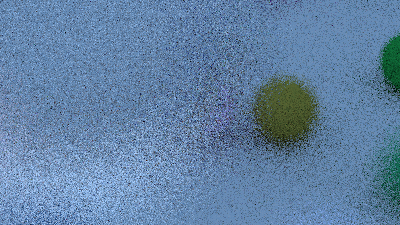

In [44]:
class Vec3:
    def __init__(self, x=0.0, y=0.0, z=0.0):
        self.x = x if type(x) == np.ndarray else np.array(x, dtype=np.float32)
        self.y = y if type(y) == np.ndarray else np.array(y, dtype=np.float32)
        self.z = z if type(z) == np.ndarray else np.array(z, dtype=np.float32)

    @staticmethod
    def empty(size):
        x = np.empty(size, dtype=np.float32)
        y = np.empty(size, dtype=np.float32)
        z = np.empty(size, dtype=np.float32)
        return Vec3(x,y,z)

    @staticmethod
    def zeros(size):
        x = np.zeros(size, dtype=np.float32)
        y = np.zeros(size, dtype=np.float32)
        z = np.zeros(size, dtype=np.float32)
        return Vec3(x,y,z)

    @staticmethod
    def ones(size):
        x = np.ones(size, dtype=np.float32)
        y = np.ones(size, dtype=np.float32)
        z = np.ones(size, dtype=np.float32)
        return Vec3(x,y,z)
    
    @staticmethod
    def where(condition, v1, v2):
        x = np.where(condition, v1.x, v2.x)
        y = np.where(condition, v1.y, v2.y)
        z = np.where(condition, v1.z, v2.z)
        return Vec3(x,y,z)
    
    def clip(self, vmin, vmax):
        x = np.clip(self.x, vmin, vmax)
        y = np.clip(self.y, vmin, vmax)
        z = np.clip(self.z, vmin, vmax)
        return Vec3(x,y,z)

    def fill(self, value):
        self.x.fill(value)
        self.y.fill(value)
        self.z.fill(value)
    
    def __str__(self):
        return 'vec3: x:%s y:%s z:%s' % (str(self.x), str(self.y), str(self.z))
    
    def __len__(self):
        return self.x.size

    def __add__(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __sub__(self, other):
        return Vec3(self.x - other.x, self.y - other.y, self.z - other.z)

    def __neg__(self):
        return Vec3(-self.x, -self.y, -self.z)

    def __mul__(self, scalar):
        return Vec3(self.x*scalar, self.y*scalar, self.z*scalar)

    def multiply(self, other):
        return Vec3(self.x * other.x, self.y * other.y, self.z * other.z)

    def __truediv__(self, scalar):
        return Vec3(self.x/scalar, self.y/scalar, self.z/scalar)
    
    def tile(self, shape):
        '''Replicate np.tile on each component'''
        return Vec3(np.tile(self.x, shape), np.tile(self.y, shape), np.tile(self.z, shape))

    def __getitem__(self, idx):
        '''Extract a vector subset'''
        return Vec3(self.x[idx], self.y[idx], self.z[idx])
    
    def __setitem__(self, idx, other):
        '''Set a vector subset from another vector'''
        self.x[idx] = other.x
        self.y[idx] = other.y
        self.z[idx] = other.z

    def join(self):
        '''Join the three components into a single 3xN array'''
        return np.vstack((self.x, self.y, self.z))
    
    def append(self, other):
        '''Append another vector to this one.
        Use concatenate() because cupy has no append function.
        '''
        self.x = np.concatenate((self.x, other.x))
        self.y = np.concatenate((self.y, other.y))
        self.z = np.concatenate((self.z, other.z))
        
display(render(image_width, image_height))


### Smarter hit record
When we have lots of objects in our world (like it the final render, almost 500 spheres), the hit record fields are going to be overwritten many times as closer and closer hits are found. We can split *update_hit_record()* in two parts, one to look for the closest sphere, and the other to calculate the normals.

We will also take advantage of the fact that our t_max is always infinite, so there is no real need to check against it, and optimize the *t* comparison.



Elapsed time: 0.245 s


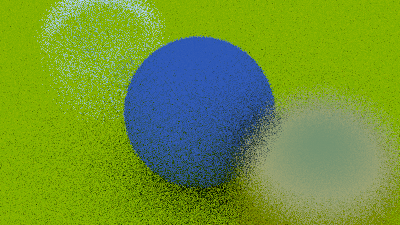

In [45]:
class HitRecord:
    def __init__(self, n, empty=False):
        self.p           = empty or Vec3.empty(n)
        self.normal      = empty or Vec3.empty(n)
        self.front_face  = empty or np.empty(n, dtype=bool)
        self.t           = empty or np.full(n, np.inf, dtype=np.float32)
        self.center      = empty or Vec3.empty(n)
        self.radius      = empty or np.empty(n, dtype=np.float32)
        self.index       = empty or np.arange(n, dtype=np.int32)
        self.material_id = empty or np.zeros(n, dtype=np.int64)

    def __getitem__(self, idx):
        other = HitRecord(len(idx), empty=True)
        other.p           = self.p[idx]
        other.normal      = self.normal[idx]
        other.front_face = self.front_face[idx]
        other.t           = self.t[idx]
        other.center      = self.center[idx]
        other.radius      = self.radius[idx]
        other.index       = self.index[idx]
        other.material_id = self.material_id[idx]
        return other

    
class Sphere(Hittable):
    '''A hittable sphere that knows how to update the hit record'''

    def __init__(self, center, radius, material):
        self.center = center
        self.radius = radius
        self.material = material 

    def update_hit_record(self, rays, t_min, t_max, hit_record):
        
        oc = rays.origin - self.center
        a = rays.direction_length_squared()
        half_b = dot(oc, rays.direction)
        c = length_squared(oc) - self.radius*self.radius
        discriminant = half_b*half_b - a*c
        
        hits = np.where(discriminant >= 0)[0]

        # Early exit if our rays did not hit the sphere at all
        if len(hits) == 0:
            return

        # Only calculate roots on those rays that have hit
        half_b = half_b[hits]
        a = a[hits]
        
        root = np.sqrt(discriminant[hits])
        t1 = (-half_b - root) / a
        t2 = (-half_b + root) / a
        
        # Update hit record where we are the closest
        t = np.where(t1 > t_min, t1, t2)
        closest = np.where((t < hit_record.t[hits]) & (t > t_min))
        
        idx = hits[closest]
        hit_record.t[idx] = t[closest]
        hit_record.center[idx] = self.center
        hit_record.radius[idx] = self.radius
        hit_record.material_id[idx] = id(self.material)


def calculate_normals(rays, hit_record):

    p = rays.at(hit_record.t)
    outward_normal = (p - hit_record.center) / hit_record.radius 
    front_face = dot(rays.direction, outward_normal) < 0 
    normal = Vec3.where(front_face, outward_normal, -outward_normal)
    
    return p, normal, front_face


def ray_color(rays):
    '''Iterative version with materials'''

    intensity = Vec3.ones(len(rays))
    all_rays = rays
    hit_record = HitRecord(len(rays))

    materials = set([x.material for x in world])

    for d in range(max_depth):

        # Initialize all distances to infinite and propagate all rays
        hit_record.t.fill(np.inf)
        hit_record.material_id.fill(0)
        
        for hittable in world:
            hittable.update_hit_record(rays, 0.001, np.inf, hit_record)         
        
        # Calculate all hits normal and build a hit record for the scattering
        hits = np.where(hit_record.t != np.inf)[0]
        p, normal, front_face = calculate_normals(rays[hits], hit_record[hits])
        
        material_rays = rays[hits]
        material_hit_record = hit_record[hits]
        material_hit_record.p = p
        material_hit_record.normal = normal
        material_hit_record.front_face = front_face
        
        for material in materials:

            material_hits = np.where(material_hit_record.material_id == id(material))[0]
            if len(material_hits) == 0:
                continue

            # Narrow down to this material and scatter
            my_rays = material_rays[material_hits]
            my_rec = material_hit_record[material_hits]
            result = material.scatter(my_rays, my_rec)         
            
            # All rays have done something
            all_rays[my_rec.index] = result.rays
            
            # Attenuation
            this_intensity = result.attenuation.multiply(intensity[my_rec.index])
            this_intensity[np.where(~result.is_scattered)] = Vec3(0,0,0)
            intensity[my_rec.index] = this_intensity

            # Those that have been scattered stop here
            not_scattered_material_idx = hits[material_hits[~result.is_scattered]]
            hit_record.t[not_scattered_material_idx] = np.inf
            
        # Iterate with those rays that have been scattered by something
        scattered_rays = np.where(hit_record.t != np.inf)[0]

        hit_record = hit_record[scattered_rays]
        rays = all_rays[hit_record.index]

        if len(rays) == 0:
            break
            
    unit_direction = unit_vector(all_rays.direction)
    t = 0.5 * unit_direction.y + 1.0
    img = (Color(1.0, 1.0, 1.0) * (1 - t) + Color(0.5, 0.7, 1.0) * t).multiply(intensity)

    return img

world = [
    Sphere(Point3( 0.0, -100.5, -1.0), 100.0, material_ground),
    Sphere(Point3( 0.0,    0.0, -1.0),   0.5, material_center),
    Sphere(Point3(-1.0,    0.0, -1.0),   0.5, material_left),
    Sphere(Point3(-1.0,    0.0, -1.0),  -0.45, material_left),
    Sphere(Point3( 1.0,    0.0, -1.0),   0.5, material_right),
]

display(render(image_width, image_height))


## Python Multiprocessing
First we split the rendering function for a single sample into its own function

0
1
2
Elapsed time: 0.227 s


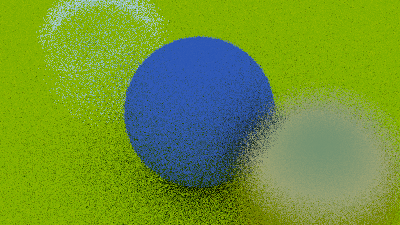

In [46]:


def img_for_sample(s, cam, u, v, width, height):
    
    uu = u + my_random(0.0, 1.0, u.size) / (width - 1)
    vv = v + my_random(0.0, 1.0, v.size) / (height - 1)

    rays = cam.get_ray(uu,vv)

    return ray_color(rays)    
    
    
def render_image(width, height):
    with Timer():
        ii, jj = np.mgrid[:float(height), :float(width)]

        u = (jj/(width-1)).flatten().astype(np.float32)
        v = (ii/(height-1)).flatten().astype(np.float32)

        cam = get_camera()

        img = Vec3.zeros(width * height)
        for s in range(samples_per_pixel):
            
            print(s)
            img += img_for_sample(s, cam, u, v, width, height)
            
        img *= 1.0 / samples_per_pixel
        img.x = np.sqrt(img.x)
        img.y = np.sqrt(img.y)
        img.z = np.sqrt(img.z)
        return img.clip(0.0, 0.999)


display(render(width, height))

Then we call it from a multiprocessing.Pool. It does not work on the notebook, because jupyter gets confused by our multiple class redefinitions in the previous notebook cells. Therefore the following cell is not marked as actual code.

```python
import multiprocessing as mp
from functools import partial, reduce

def render_image(width, height):
    with Timer():
        ii, jj = np.mgrid[:float(height), :float(width)]

        u = (jj/(width-1)).flatten().astype(np.float32)
        v = (ii/(height-1)).flatten().astype(np.float32)

        cam = get_camera()1

        img = Vec3.zeros(width * height)
        myfunc = partial(img_for_sample, cam=cam, u=u, v=v, width=width, height=height)
        
        with mp.Pool() as p:
            samples = p.map(myfunc, range(samples_per_pixel))
           
        img = sum(samples)
        img *= 1.0 / samples_per_pixel
        img.x = np.sqrt(img.x)
        img.y = np.sqrt(img.y)
        img.z = np.sqrt(img.z)
        return img.clip(0.0, 0.999)

display(render(width, height))
```